In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error #calculating RMSE

#importing statistical libraries from statsmodel
from statsmodels.tsa.seasonal import seasonal_decompose #for seasonal decompose
from statsmodels.tsa.api    import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as      em #calculating RMSE
from statsmodels.tsa.stattools import adfuller

#importing pmdarima for auto ARIMA,SARIMA
from pmdarima.arima import auto_arima


import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'pmdarima'

In [3]:
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## EDA of file_02

In [4]:
#reading df file
df=pd.read_csv("/kaggle/input/daily-power-generation-in-india-20172020/file_02.csv")

In [5]:
#printing first 10 rows of the dataset
df.head(10)

index        Date        Region Thermal Generation Actual (in MU)  \
0      0  2017-09-01      Northern                            624.23   
1      1  2017-09-01       Western                          1,106.89   
2      2  2017-09-01      Southern                            576.66   
3      3  2017-09-01       Eastern                            441.02   
4      4  2017-09-01  NorthEastern                             29.11   
5      5  2017-09-02      Northern                            624.23   
6      6  2017-09-02       Western                          1,106.89   
7      7  2017-09-02      Southern                            576.66   
8      8  2017-09-02       Eastern                            441.02   
9      9  2017-09-02  NorthEastern                             29.11   

  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  \
0                               484.21                              30.36   
1                             1,024.33                              25.17   
2                               578.55                              62.73   
3                               429.39                                NaN   
4                                15.91                                NaN   
5                               507.42                              30.36   
6                             1,050.91                              25.17   
7                               562.79                              62.73   
8                               425.75                                NaN   
9                                16.50                                NaN   

   Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  \
0                                 35.57                           273.27   
1                                  3.81                            72.00   
2                                 49.80                           111.57   
3                                   NaN                            85.94   
4                                   NaN                            24.64   
5                                 35.69                           273.27   
6                                  3.83                            72.00   
7                                 52.76                           111.57   
8                                   NaN                            85.94   
9                                   NaN                            24.64   

   Hydro Generation Estimated (in MU)  
0                              320.81  
1                               21.53  
2                               64.78  
3                               69.36  
4                               21.21  
5                              317.19  
6                               23.97  
7                               59.49  
8                               74.18  
9                               20.81

In [6]:
#printing last 10 rows of the dataset
df.tail(10)

index        Date        Region Thermal Generation Actual (in MU)  \
4935    300  2020-07-31      Northern                            708.11   
4936    301  2020-07-31       Western                          1,199.28   
4937    302  2020-07-31      Southern                            543.60   
4938    303  2020-07-31       Eastern                            496.03   
4939    304  2020-07-31  NorthEastern                             36.98   
4940    305  2020-08-01      Northern                            669.47   
4941    306  2020-08-01       Western                          1,116.00   
4942    307  2020-08-01      Southern                            494.66   
4943    308  2020-08-01       Eastern                            482.86   
4944    309  2020-08-01  NorthEastern                             34.42   

     Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  \
4935                               625.88                              26.88   
4936                             1,288.65                              42.37   
4937                               444.43                              61.83   
4938                               553.21                                NaN   
4939                                30.94                                NaN   
4940                               602.96                              26.88   
4941                             1,262.10                              42.37   
4942                               415.53                              61.83   
4943                               547.03                                NaN   
4944                                32.81                                NaN   

      Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  \
4935                                 22.78                           327.08   
4936                                 36.68                            29.75   
4937                                 26.21                            61.43   
4938                                   NaN                            80.00   
4939                                   NaN                            27.51   
4940                                 23.41                           348.72   
4941                                 36.63                            54.67   
4942                                 26.28                            93.49   
4943                                   NaN                            87.22   
4944                                   NaN                            29.87   

      Hydro Generation Estimated (in MU)  
4935                              348.39  
4936                               19.26  
4937                               85.42  
4938                               96.30  
4939                               29.76  
4940                              351.98  
4941                               20.28  
4942                               77.25  
4943                               93.78  
4944                               29.96

From the code it can seen that there are some null values in the data.In Eastern zone and North Eastern Zone mainly the null values are there for Nuclear Power generation.IT is because there are no nuclear power plant in Eastern and North Eastern India.

Data is taken from 1st of september 2017 -1st of august 2020

In [7]:
#getting info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   object 
 4   Thermal Generation Estimated (in MU)  4945 non-null   object 
 5   Nuclear Generation Actual (in MU)     2967 non-null   float64
 6   Nuclear Generation Estimated (in MU)  2967 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.8+ KB


There are 4945 rows and 9 columns are there.
Only  Nuclear Generation Actual (in MU) and  Nuclear Generation Estimated (in MU) have null values.
There are 4 float datatypes,1 integer and 4 object datatype variables.

In [8]:
#Replacing delimiter in Values in Thermal generation Actual and Estimated
df["Thermal Generation Actual (in MU)"]=df["Thermal Generation Actual (in MU)"].str.replace(',','')
df["Thermal Generation Estimated (in MU)"]=df["Thermal Generation Estimated (in MU)"].str.replace(',','')

In [9]:
#converting Thermal Generation Actual(in MU) and Thermal Generation Actual(in MU) from object to float
df["Thermal Generation Actual (in MU)"] = df["Thermal Generation Actual (in MU)"].astype(float)
df["Thermal Generation Estimated (in MU)"] = df["Thermal Generation Estimated (in MU)"].astype(float)

In [10]:
#getting statistical description of the data
df.describe()

index  Thermal Generation Actual (in MU)  \
count  4945.000000                        4945.000000   
mean   2181.433771                         603.978358   
std    1397.754755                         383.534208   
min       0.000000                          12.340000   
25%     926.000000                         470.050000   
50%    2162.000000                         615.280000   
75%    3398.000000                         689.530000   
max    4634.000000                        1395.970000   

       Thermal Generation Estimated (in MU)  \
count                           4945.000000   
mean                             575.395116   
std                              383.387299   
min                               12.380000   
25%                              427.460000   
50%                              535.980000   
75%                              672.740000   
max                             1442.380000   

       Nuclear Generation Actual (in MU)  \
count                        2967.000000   
mean                           37.242208   
std                            15.883968   
min                             0.000000   
25%                            26.140000   
50%                            30.720000   
75%                            46.830000   
max                            68.740000   

       Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  \
count                           2967.000000                      4945.000000   
mean                              36.987877                        73.305921   
std                               11.491292                        74.482145   
min                                0.000000                         0.000000   
25%                               30.190000                        26.910000   
50%                               34.840000                        52.960000   
75%                               43.075000                        85.940000   
max                               76.640000                       348.720000   

       Hydro Generation Estimated (in MU)  
count                         4945.000000  
mean                            76.842965  
std                             82.043952  
min                              0.000000  
25%                             23.310000  
50%                             50.270000  
75%                             95.800000  
max                            397.380000

Observations:1)Thermal power actual generation mean is more than estimated generation mean.Same with nuclear power generation.  
2)Where as Hydro Power generation in actual is less than estimated hydro power generation.  
3)Min power generation :-Thermal-12.34 MU,Nuclear-0,Hydro -0  
4)Max power generation :-Thermal-1395.97 MU,Nuclear-68.74 MU,Hydro-348.72 MU  

In [11]:
#getting unique values from region columns
df['Region'].unique()

array(['Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'],
      dtype=object)

There are 5 region in the dataset-'Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'

In [12]:
#Counting duplicate values
df.duplicated().sum()

0

There are no duplicate values

In [13]:
#Counting null value
df.isnull().sum()

index                                      0
Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

In [14]:
#Counting null values according to Region
missing_pct=df.isnull().sum()*100/len(df)
missing_pct

index                                    0.0
Date                                     0.0
Region                                   0.0
Thermal Generation Actual (in MU)        0.0
Thermal Generation Estimated (in MU)     0.0
Nuclear Generation Actual (in MU)       40.0
Nuclear Generation Estimated (in MU)    40.0
Hydro Generation Actual (in MU)          0.0
Hydro Generation Estimated (in MU)       0.0
dtype: float64

40 % of null values are present in Nuclear generation column.

In [15]:
#counting negative values
df[df[['Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']]<0].count()

index                                   0
Date                                    0
Region                                  0
Thermal Generation Actual (in MU)       0
Thermal Generation Estimated (in MU)    0
Nuclear Generation Actual (in MU)       0
Nuclear Generation Estimated (in MU)    0
Hydro Generation Actual (in MU)         0
Hydro Generation Estimated (in MU)      0
dtype: int64

There are no negative values

In [16]:
df.groupby(['Region']).count()

index  Date  Thermal Generation Actual (in MU)  \
Region                                                         
Eastern         989   989                                989   
NorthEastern    989   989                                989   
Northern        989   989                                989   
Southern        989   989                                989   
Western         989   989                                989   

              Thermal Generation Estimated (in MU)  \
Region                                               
Eastern                                        989   
NorthEastern                                   989   
Northern                                       989   
Southern                                       989   
Western                                        989   

              Nuclear Generation Actual (in MU)  \
Region                                            
Eastern                                       0   
NorthEastern                                  0   
Northern                                    989   
Southern                                    989   
Western                                     989   

              Nuclear Generation Estimated (in MU)  \
Region                                               
Eastern                                          0   
NorthEastern                                     0   
Northern                                       989   
Southern                                       989   
Western                                        989   

              Hydro Generation Actual (in MU)  \
Region                                          
Eastern                                   989   
NorthEastern                              989   
Northern                                  989   
Southern                                  989   
Western                                   989   

              Hydro Generation Estimated (in MU)  
Region                                            
Eastern                                      989  
NorthEastern                                 989  
Northern                                     989  
Southern                                     989  
Western                                      989

Observations:only 2 region has null values ,Eastern and North Eastern region,where there are no nuclear power plants.

In [17]:
df1=df.groupby(by='Region')[['Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']].sum()
df1


Thermal Generation Actual (in MU)  \
Region                                            
Eastern                               482123.72   
NorthEastern                           32115.79   
Northern                              655048.26   
Southern                              610753.56   
Western                              1206631.65   

              Thermal Generation Estimated (in MU)  \
Region                                               
Eastern                                  468831.45   
NorthEastern                              33105.95   
Northern                                 602168.52   
Southern                                 543828.71   
Western                                 1197394.22   

              Nuclear Generation Actual (in MU)  \
Region                                            
Eastern                                    0.00   
NorthEastern                               0.00   
Northern                               26964.08   
Southern                               55855.21   
Western                                27678.34   

              Nuclear Generation Estimated (in MU)  \
Region                                               
Eastern                                       0.00   
NorthEastern                                  0.00   
Northern                                  31378.94   
Southern                                  46483.24   
Western                                   31880.85   

              Hydro Generation Actual (in MU)  \
Region                                          
Eastern                              48686.62   
NorthEastern                         17612.32   
Northern                            188854.16   
Southern                             71109.34   
Western                              36235.34   

              Hydro Generation Estimated (in MU)  
Region                                            
Eastern                                 52461.95  
NorthEastern                            14058.66  
Northern                               201204.03  
Southern                                77083.80  
Western                                 35180.02

Western Region has the highest consumption of Thermal Power.  
Southern Region has the highest consumption of Nuclear Power.  
Northern Region has the highest consumption of Hydro Power.  
There are no generation of Nuclear Power in Eastern Region and North Eastern Region.  
All the regions are highly dependent on Thermal Power.

In [18]:
#filling all the NAN values with zero
df['Nuclear Generation Actual (in MU)']=df['Nuclear Generation Actual (in MU)'].fillna(0)
df['Nuclear Generation Estimated (in MU)']=df['Nuclear Generation Estimated (in MU)'].fillna(0)

In [19]:
#calculating total power generated and estimated
df['Total Power Actual Generated (in MU)']=df['Thermal Generation Actual (in MU)']+df['Nuclear Generation Actual (in MU)']+df['Hydro Generation Actual (in MU)']
df['Total Power Estimated (in MU)']=df['Thermal Generation Estimated (in MU)']+df['Nuclear Generation Estimated (in MU)']+df['Hydro Generation Estimated (in MU)']
df

index        Date        Region  Thermal Generation Actual (in MU)  \
0         0  2017-09-01      Northern                             624.23   
1         1  2017-09-01       Western                            1106.89   
2         2  2017-09-01      Southern                             576.66   
3         3  2017-09-01       Eastern                             441.02   
4         4  2017-09-01  NorthEastern                              29.11   
...     ...         ...           ...                                ...   
4940    305  2020-08-01      Northern                             669.47   
4941    306  2020-08-01       Western                            1116.00   
4942    307  2020-08-01      Southern                             494.66   
4943    308  2020-08-01       Eastern                             482.86   
4944    309  2020-08-01  NorthEastern                              34.42   

      Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  \
0                                   484.21                              30.36   
1                                  1024.33                              25.17   
2                                   578.55                              62.73   
3                                   429.39                               0.00   
4                                    15.91                               0.00   
...                                    ...                                ...   
4940                                602.96                              26.88   
4941                               1262.10                              42.37   
4942                                415.53                              61.83   
4943                                547.03                               0.00   
4944                                 32.81                               0.00   

      Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  \
0                                    35.57                           273.27   
1                                     3.81                            72.00   
2                                    49.80                           111.57   
3                                     0.00                            85.94   
4                                     0.00                            24.64   
...                                    ...                              ...   
4940                                 23.41                           348.72   
4941                                 36.63                            54.67   
4942                                 26.28                            93.49   
4943                                  0.00                            87.22   
4944                                  0.00                            29.87   

      Hydro Generation Estimated (in MU)  \
0                                 320.81   
1                                  21.53   
2                                  64.78   
3                                  69.36   
4                                  21.21   
...                                  ...   
4940                              351.98   
4941                               20.28   
4942                               77.25   
4943                               93.78   
4944                               29.96   

      Total Power Actual Generated (in MU)  Total Power Estimated (in MU)  
0                                   927.86                         840.59  
1                                  1204.06                        1049.67  
2                                   750.96                         693.13  
3                                   526.96                         498.75  
4                                    53.75                          37.12  
...                                    ...                            ...  
4940                               1045.07                         978.35  
4941                              

In [20]:
#getting region wise total power 
df1=df.groupby(by='Region')[['Total Power Actual Generated (in MU)','Total Power Estimated (in MU)']].sum()
df1


Total Power Actual Generated (in MU)  \
Region                                               
Eastern                                  530810.34   
NorthEastern                              49728.11   
Northern                                 870866.50   
Southern                                 737718.11   
Western                                 1270545.33   

              Total Power Estimated (in MU)  
Region                                       
Eastern                           521293.40  
NorthEastern                       47164.61  
Northern                          834751.49  
Southern                          667395.75  
Western                          1264455.09

Western Region has the highest consumption of Electricity Power.  
North Eastern Region has the lowest Consumption of Electricity Power.   
Actual Power generation is more than the estimated power generation.  


## Univariate Analysis

In [21]:
#converting date datatype from object to datetime
df['Date']=pd.to_datetime(df['Date'])

Text(0.5, 1.0, 'date index relation')

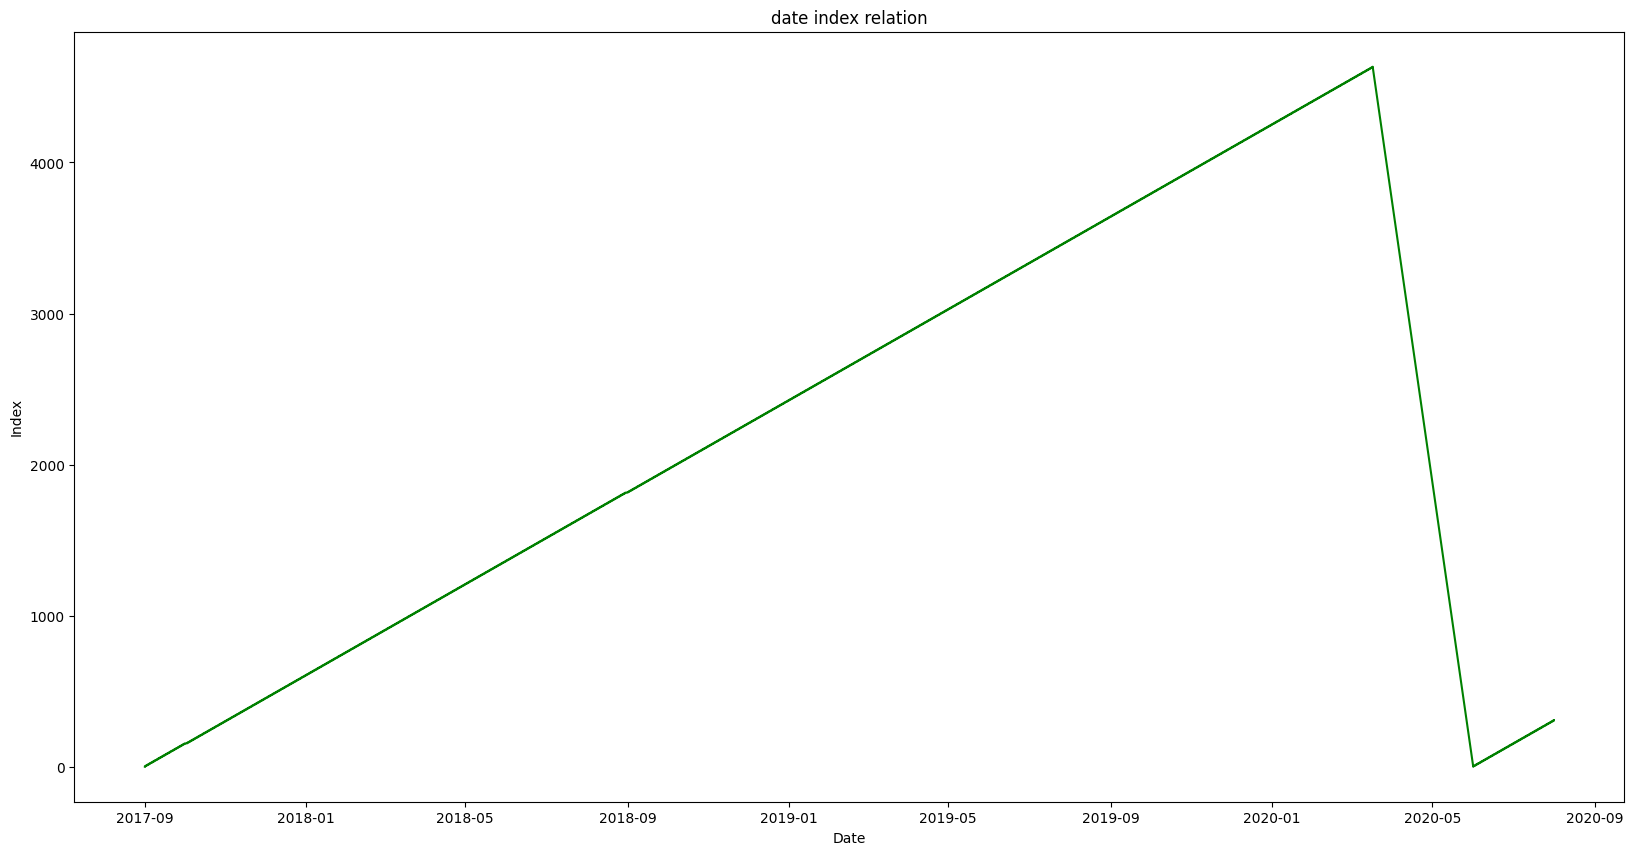

In [22]:
#plotting date against Index to find missing date
plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['index'],c='g')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('date index relation')

There are some missing dates in the dataset in the year 2020.

In [23]:
df.drop(['index'],axis=1,inplace=True)

In [24]:
#changing date column to index and finding all the missing dates
df=df.set_index('Date')
pd.date_range(df.index.min(), df.index.max(),).difference(df.index)


DatetimeIndex(['2017-10-02', '2018-08-31', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
      

These are the missing dates.

In [25]:
df

Region  Thermal Generation Actual (in MU)  \
Date                                                          
2017-09-01      Northern                             624.23   
2017-09-01       Western                            1106.89   
2017-09-01      Southern                             576.66   
2017-09-01       Eastern                             441.02   
2017-09-01  NorthEastern                              29.11   
...                  ...                                ...   
2020-08-01      Northern                             669.47   
2020-08-01       Western                            1116.00   
2020-08-01      Southern                             494.66   
2020-08-01       Eastern                             482.86   
2020-08-01  NorthEastern                              34.42   

            Thermal Generation Estimated (in MU)  \
Date                                               
2017-09-01                                484.21   
2017-09-01                               1024.33   
2017-09-01                                578.55   
2017-09-01                                429.39   
2017-09-01                                 15.91   
...                                          ...   
2020-08-01                                602.96   
2020-08-01                               1262.10   
2020-08-01                                415.53   
2020-08-01                                547.03   
2020-08-01                                 32.81   

            Nuclear Generation Actual (in MU)  \
Date                                            
2017-09-01                              30.36   
2017-09-01                              25.17   
2017-09-01                              62.73   
2017-09-01                               0.00   
2017-09-01                               0.00   
...                                       ...   
2020-08-01                              26.88   
2020-08-01                              42.37   
2020-08-01                              61.83   
2020-08-01                               0.00   
2020-08-01                               0.00   

            Nuclear Generation Estimated (in MU)  \
Date                                               
2017-09-01                                 35.57   
2017-09-01                                  3.81   
2017-09-01                                 49.80   
2017-09-01                                  0.00   
2017-09-01                                  0.00   
...                                          ...   
2020-08-01                                 23.41   
2020-08-01                                 36.63   
2020-08-01                                 26.28   
2020-08-01                                  0.00   
2020-08-01                                  0.00   

            Hydro Generation Actual (in MU)  \
Date                                          
2017-09-01                           273.27   
2017-09-01                            72.00   
2017-09-01                           111.57   
2017-09-01                            85.94   
2017-09-01                            24.64   
...                                     ...   
2020-08-01                           348.72   
2020-08-01                            54.67   
2020-08-01                            93.49   
2020-08-01                            87.22   
2020-08-01                            29.87   

            Hydro Generation Estimated (in MU)  \
Date                                             
2017-09-01                              320.81   
2017-09-01                               21.53   
2017-09-01                               64.78   
2017-09-01                               69.36   
2017-09-01                               21.21   
...                                        ...   
2020-08-01                              351.98   
2020-08-01                               20.28   
2020-08-01                               77.25   
2020-08-01                               93.

In [26]:
#upsampled = df.resample('D')
#print(upsampled.head(32))

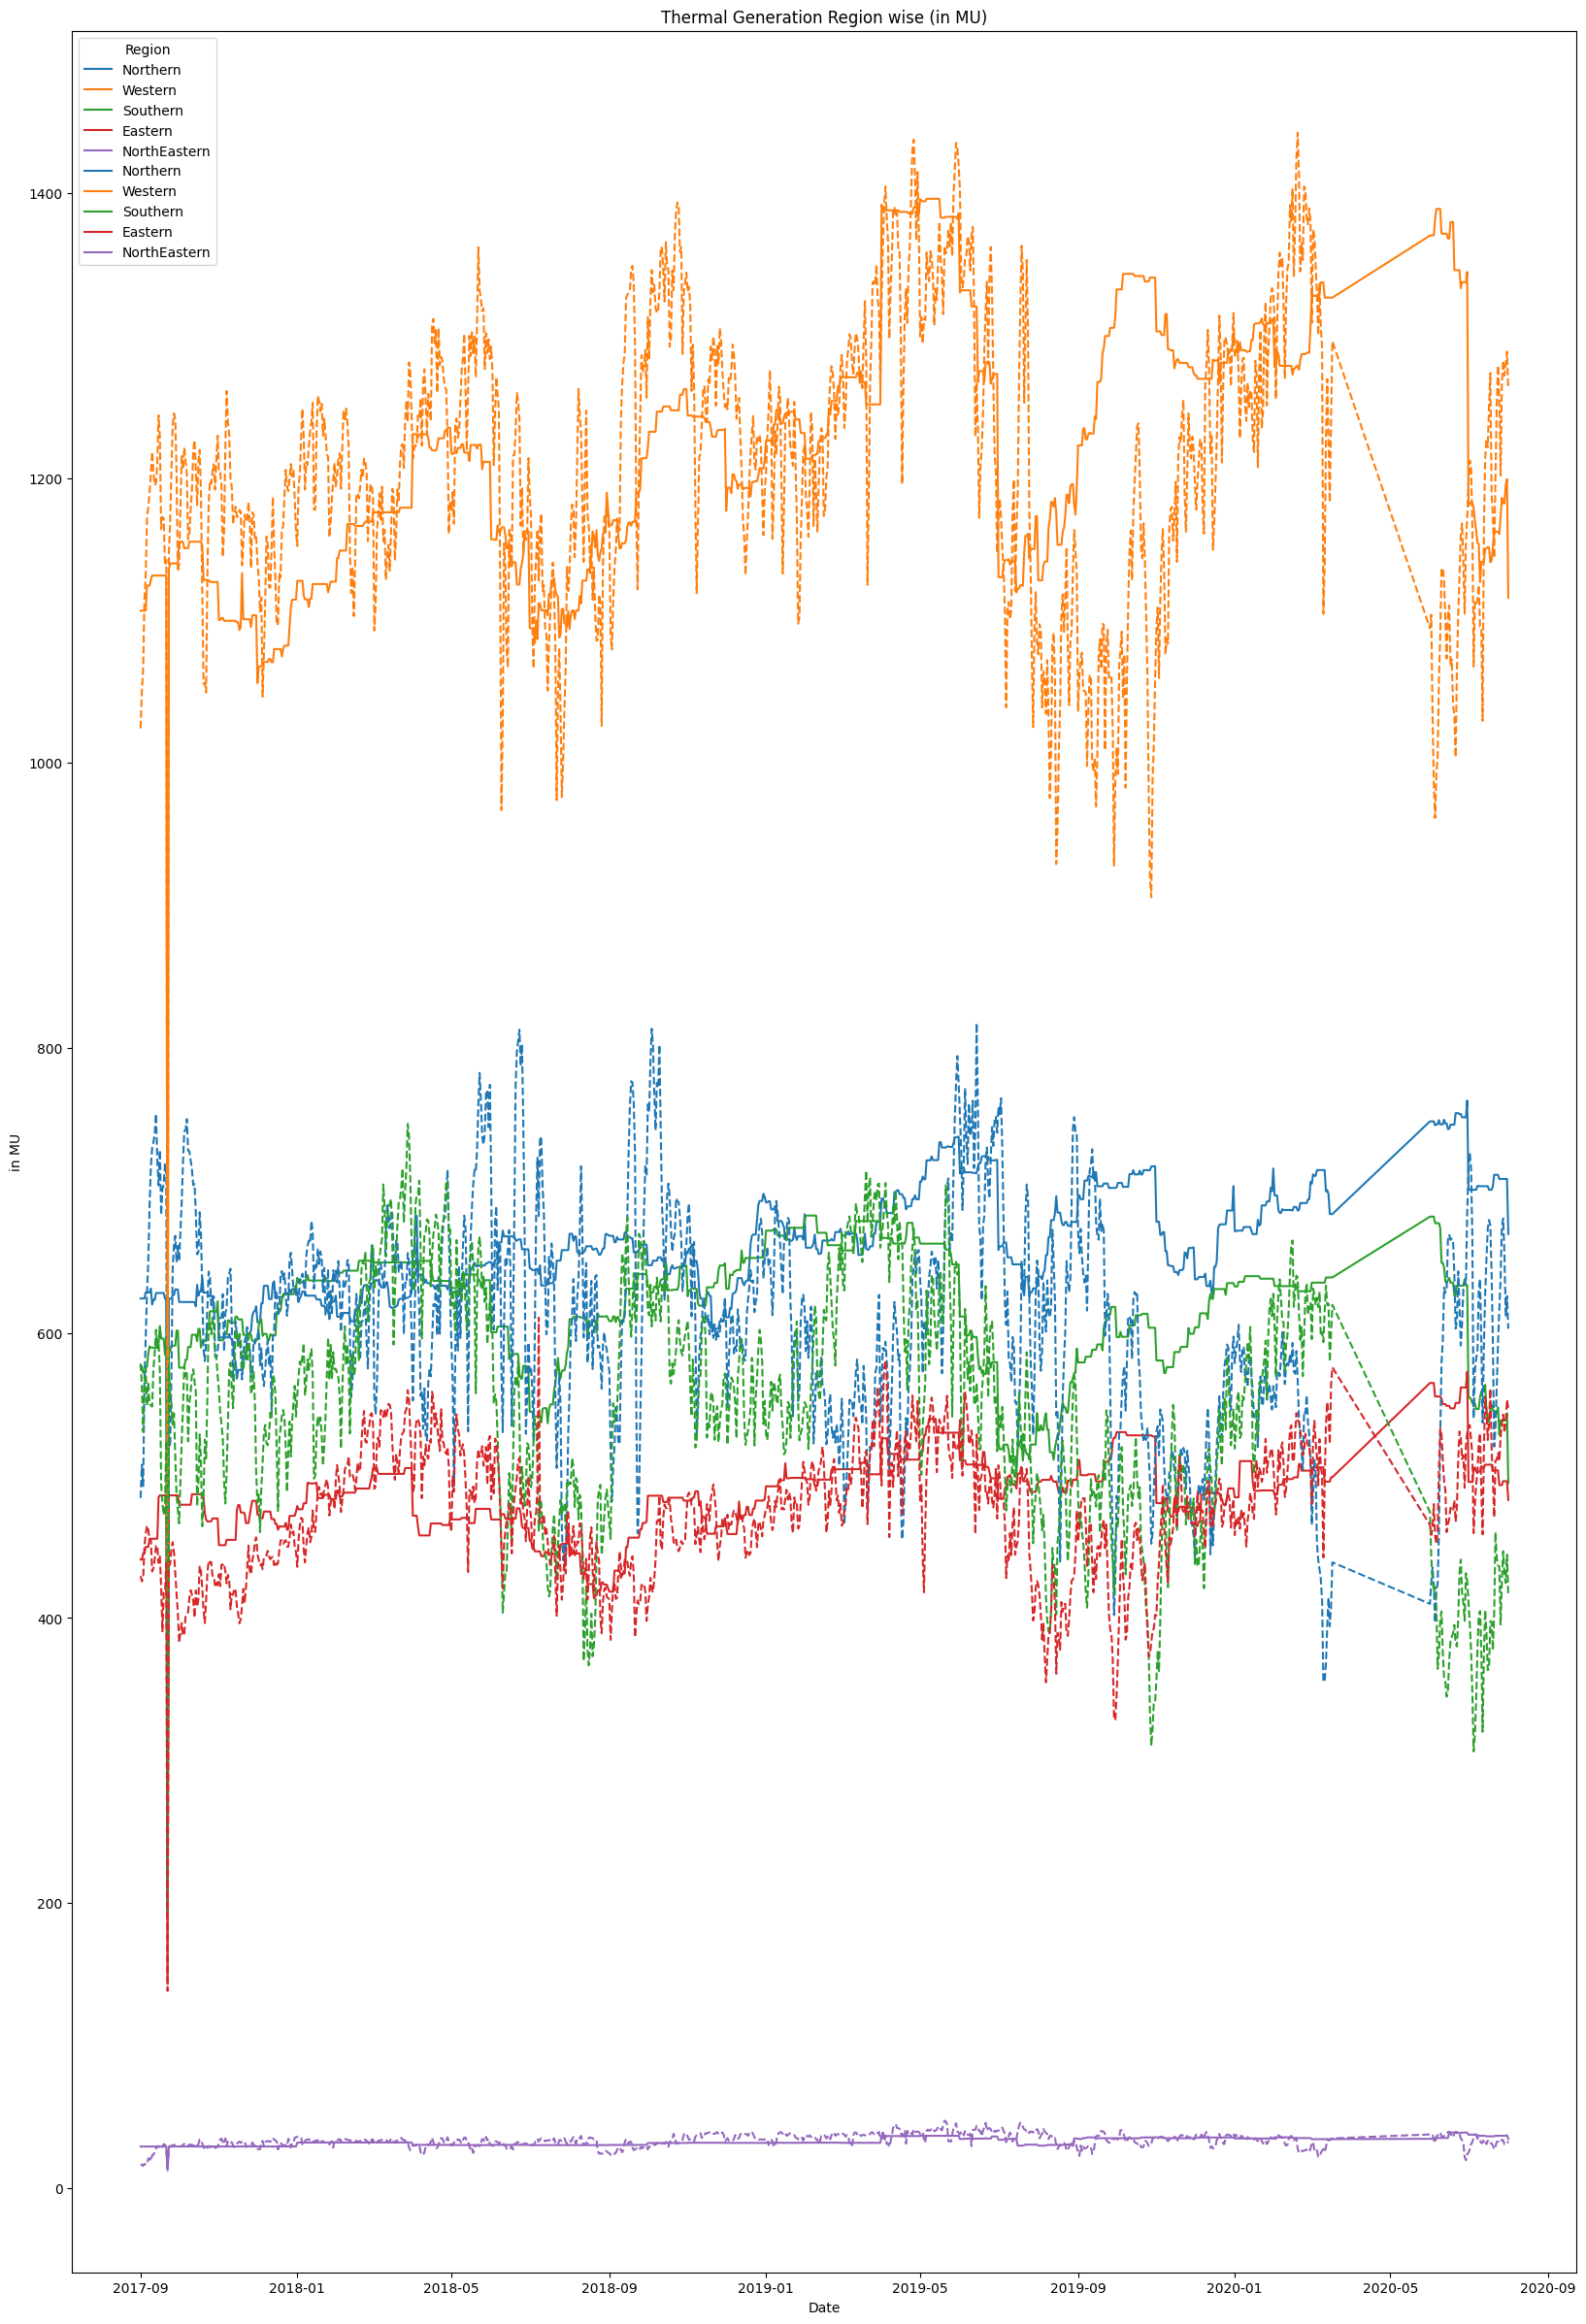

In [27]:
##plotting Thermal Power (Actual and Estimated) with date
plt.figure(figsize=(20,30))
sns.lineplot(data=df,x='Date',y='Thermal Generation Actual (in MU)',ci=False,hue='Region')
sns.lineplot(data=df,x='Date',y='Thermal Generation Estimated (in MU)',ci=False,hue='Region',linestyle='dashed')
plt.ylabel('in MU')
plt.title("Thermal Generation Region wise (in MU)")
plt.show();

It is clearly visible that thermal power consumption in western region is higher among all other regions.  
In Northern and Southern Regions the thermal power consumptions are almost same .  
North Eastern has the lowest thermal power consumption.  
In all the regions the estimated thermal power generation is lower than the actual power generated.The reason is might be as per to the requirement of the region.

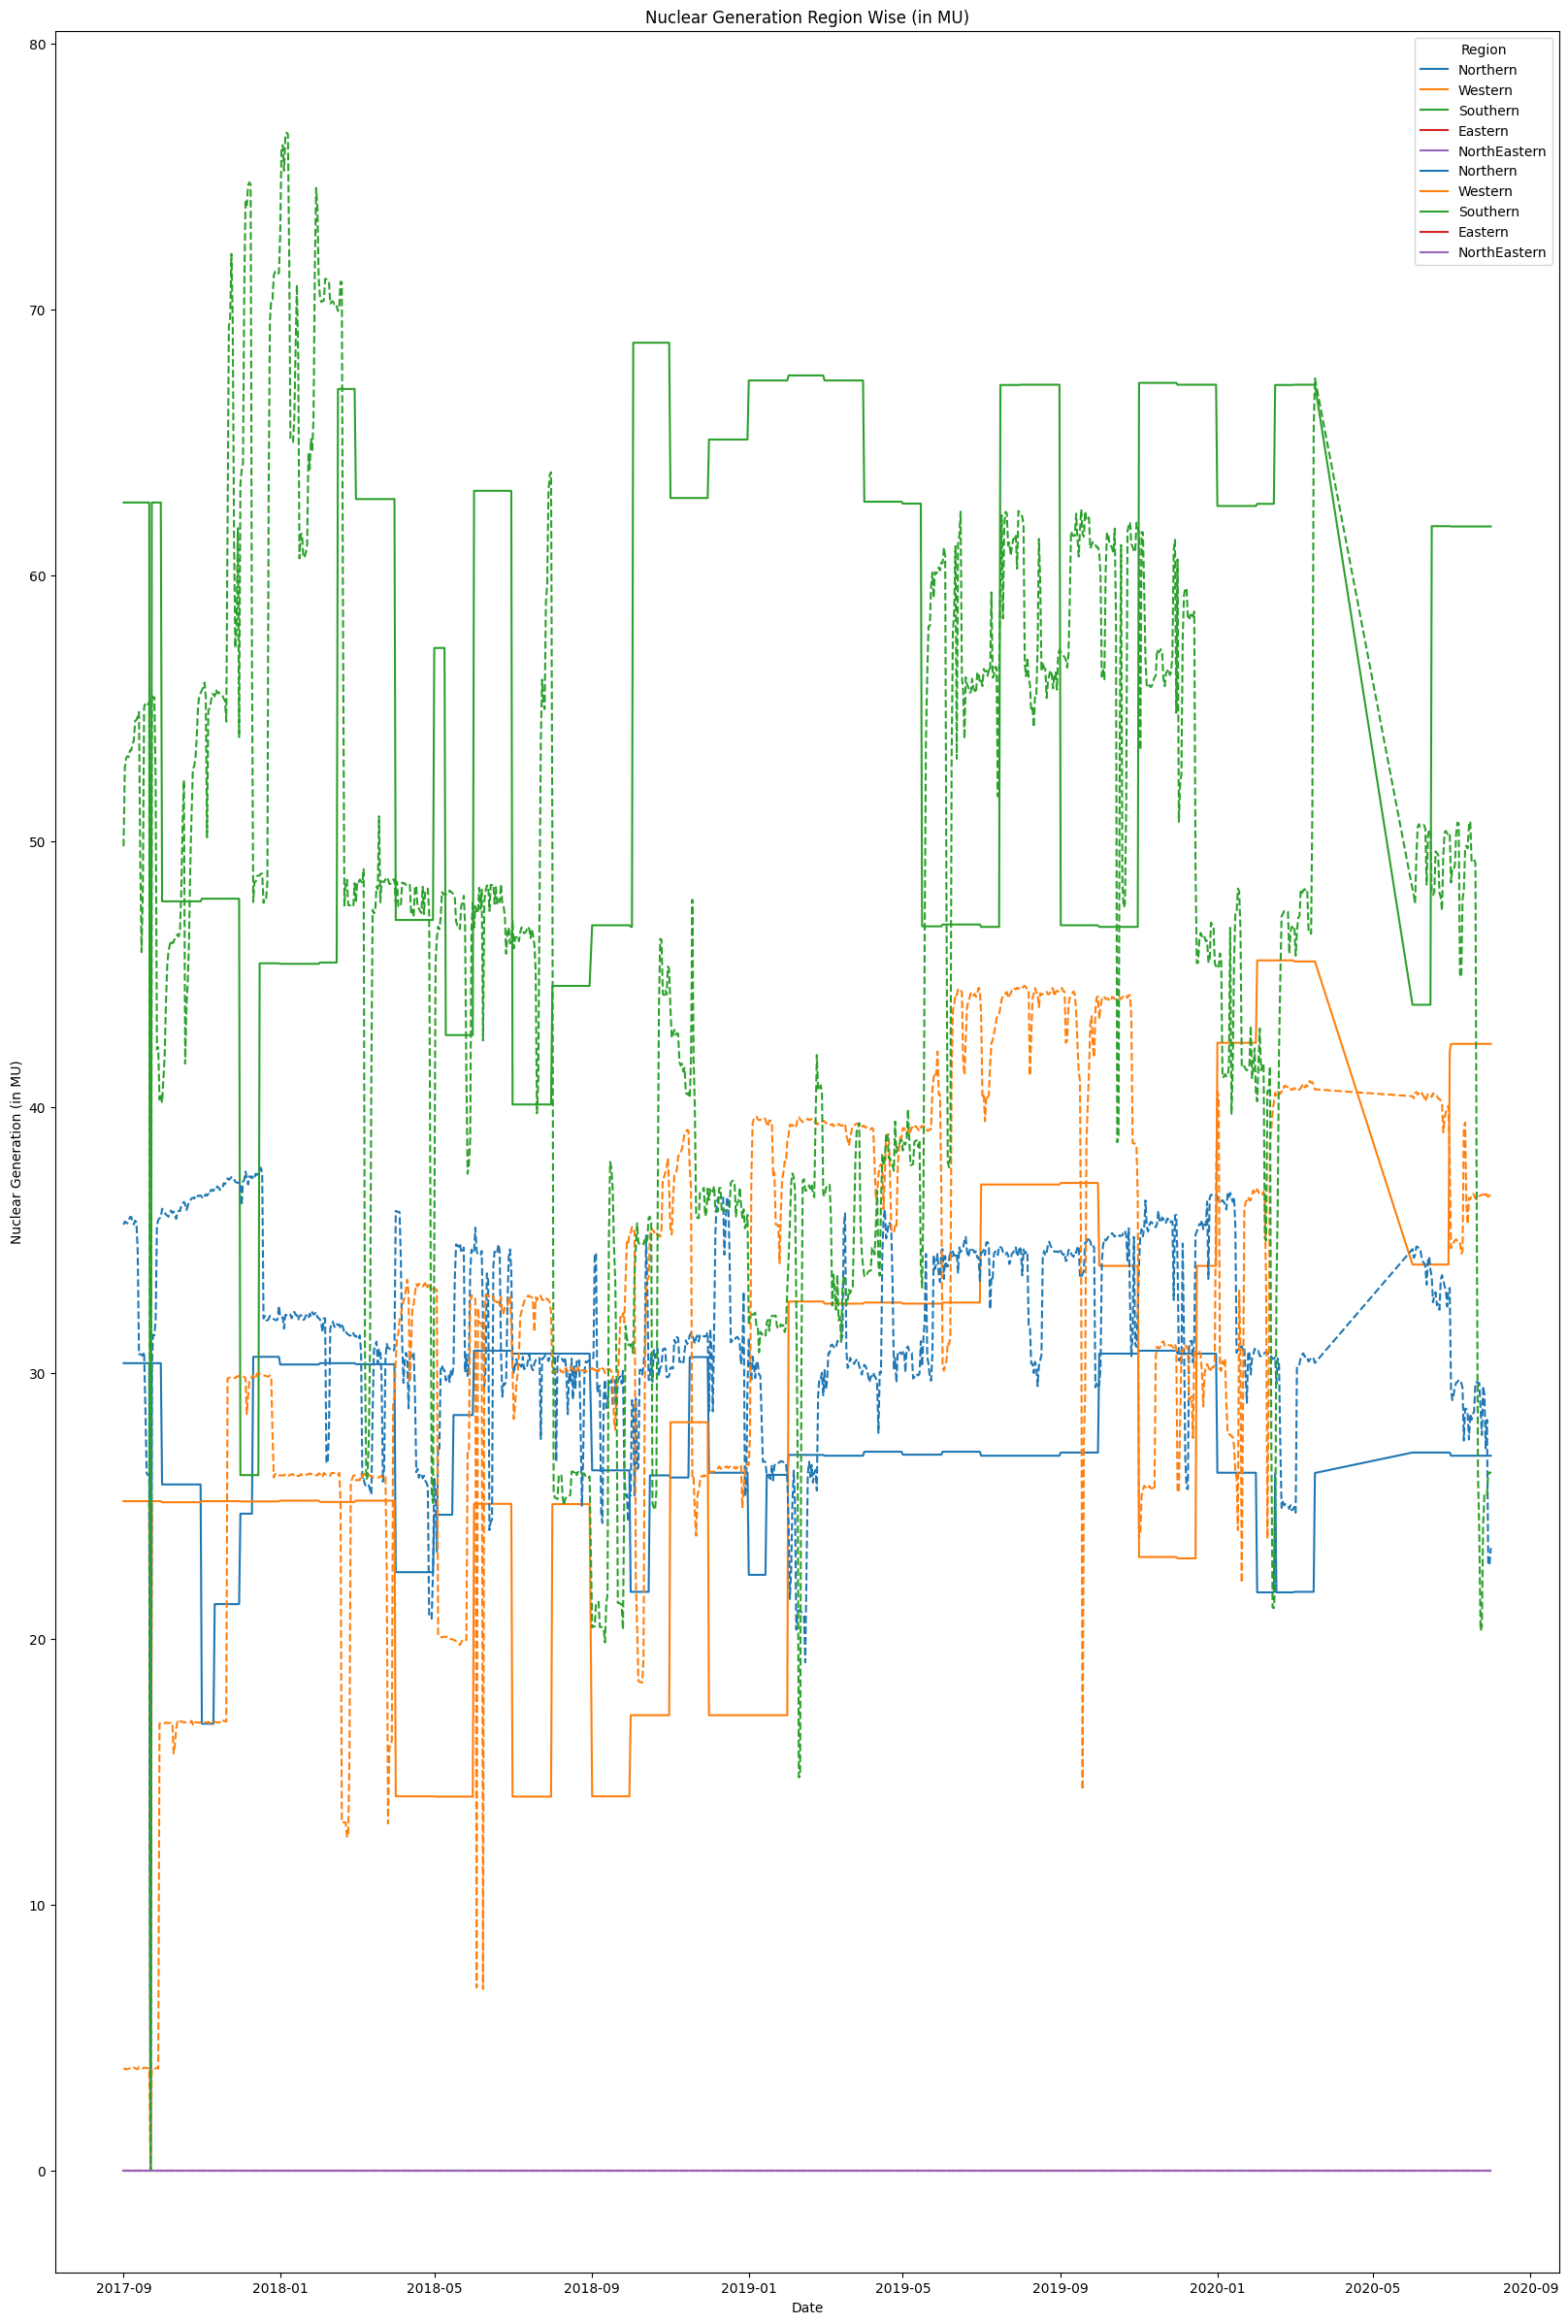

In [28]:
#plotting Nuclear Power (Actual and Estimated) with date
plt.figure(figsize=(20,30))
sns.lineplot(data=df,x='Date',y='Nuclear Generation Actual (in MU)',hue='Region',ci=False)
sns.lineplot(data=df,x='Date',y='Nuclear Generation Estimated (in MU)',hue='Region',ci=False,linestyle="dashed")
plt.title("Nuclear Generation Region Wise (in MU)")
plt.ylabel("Nuclear Generation (in MU)")
plt.show();

There are trends in the Plot.  
The nuclear power generated are same for some days.They are square.  
No nuclear power is used in North Eastern and Eastern Region.  
Southern Region has the highest consumption of Nuclear Power .

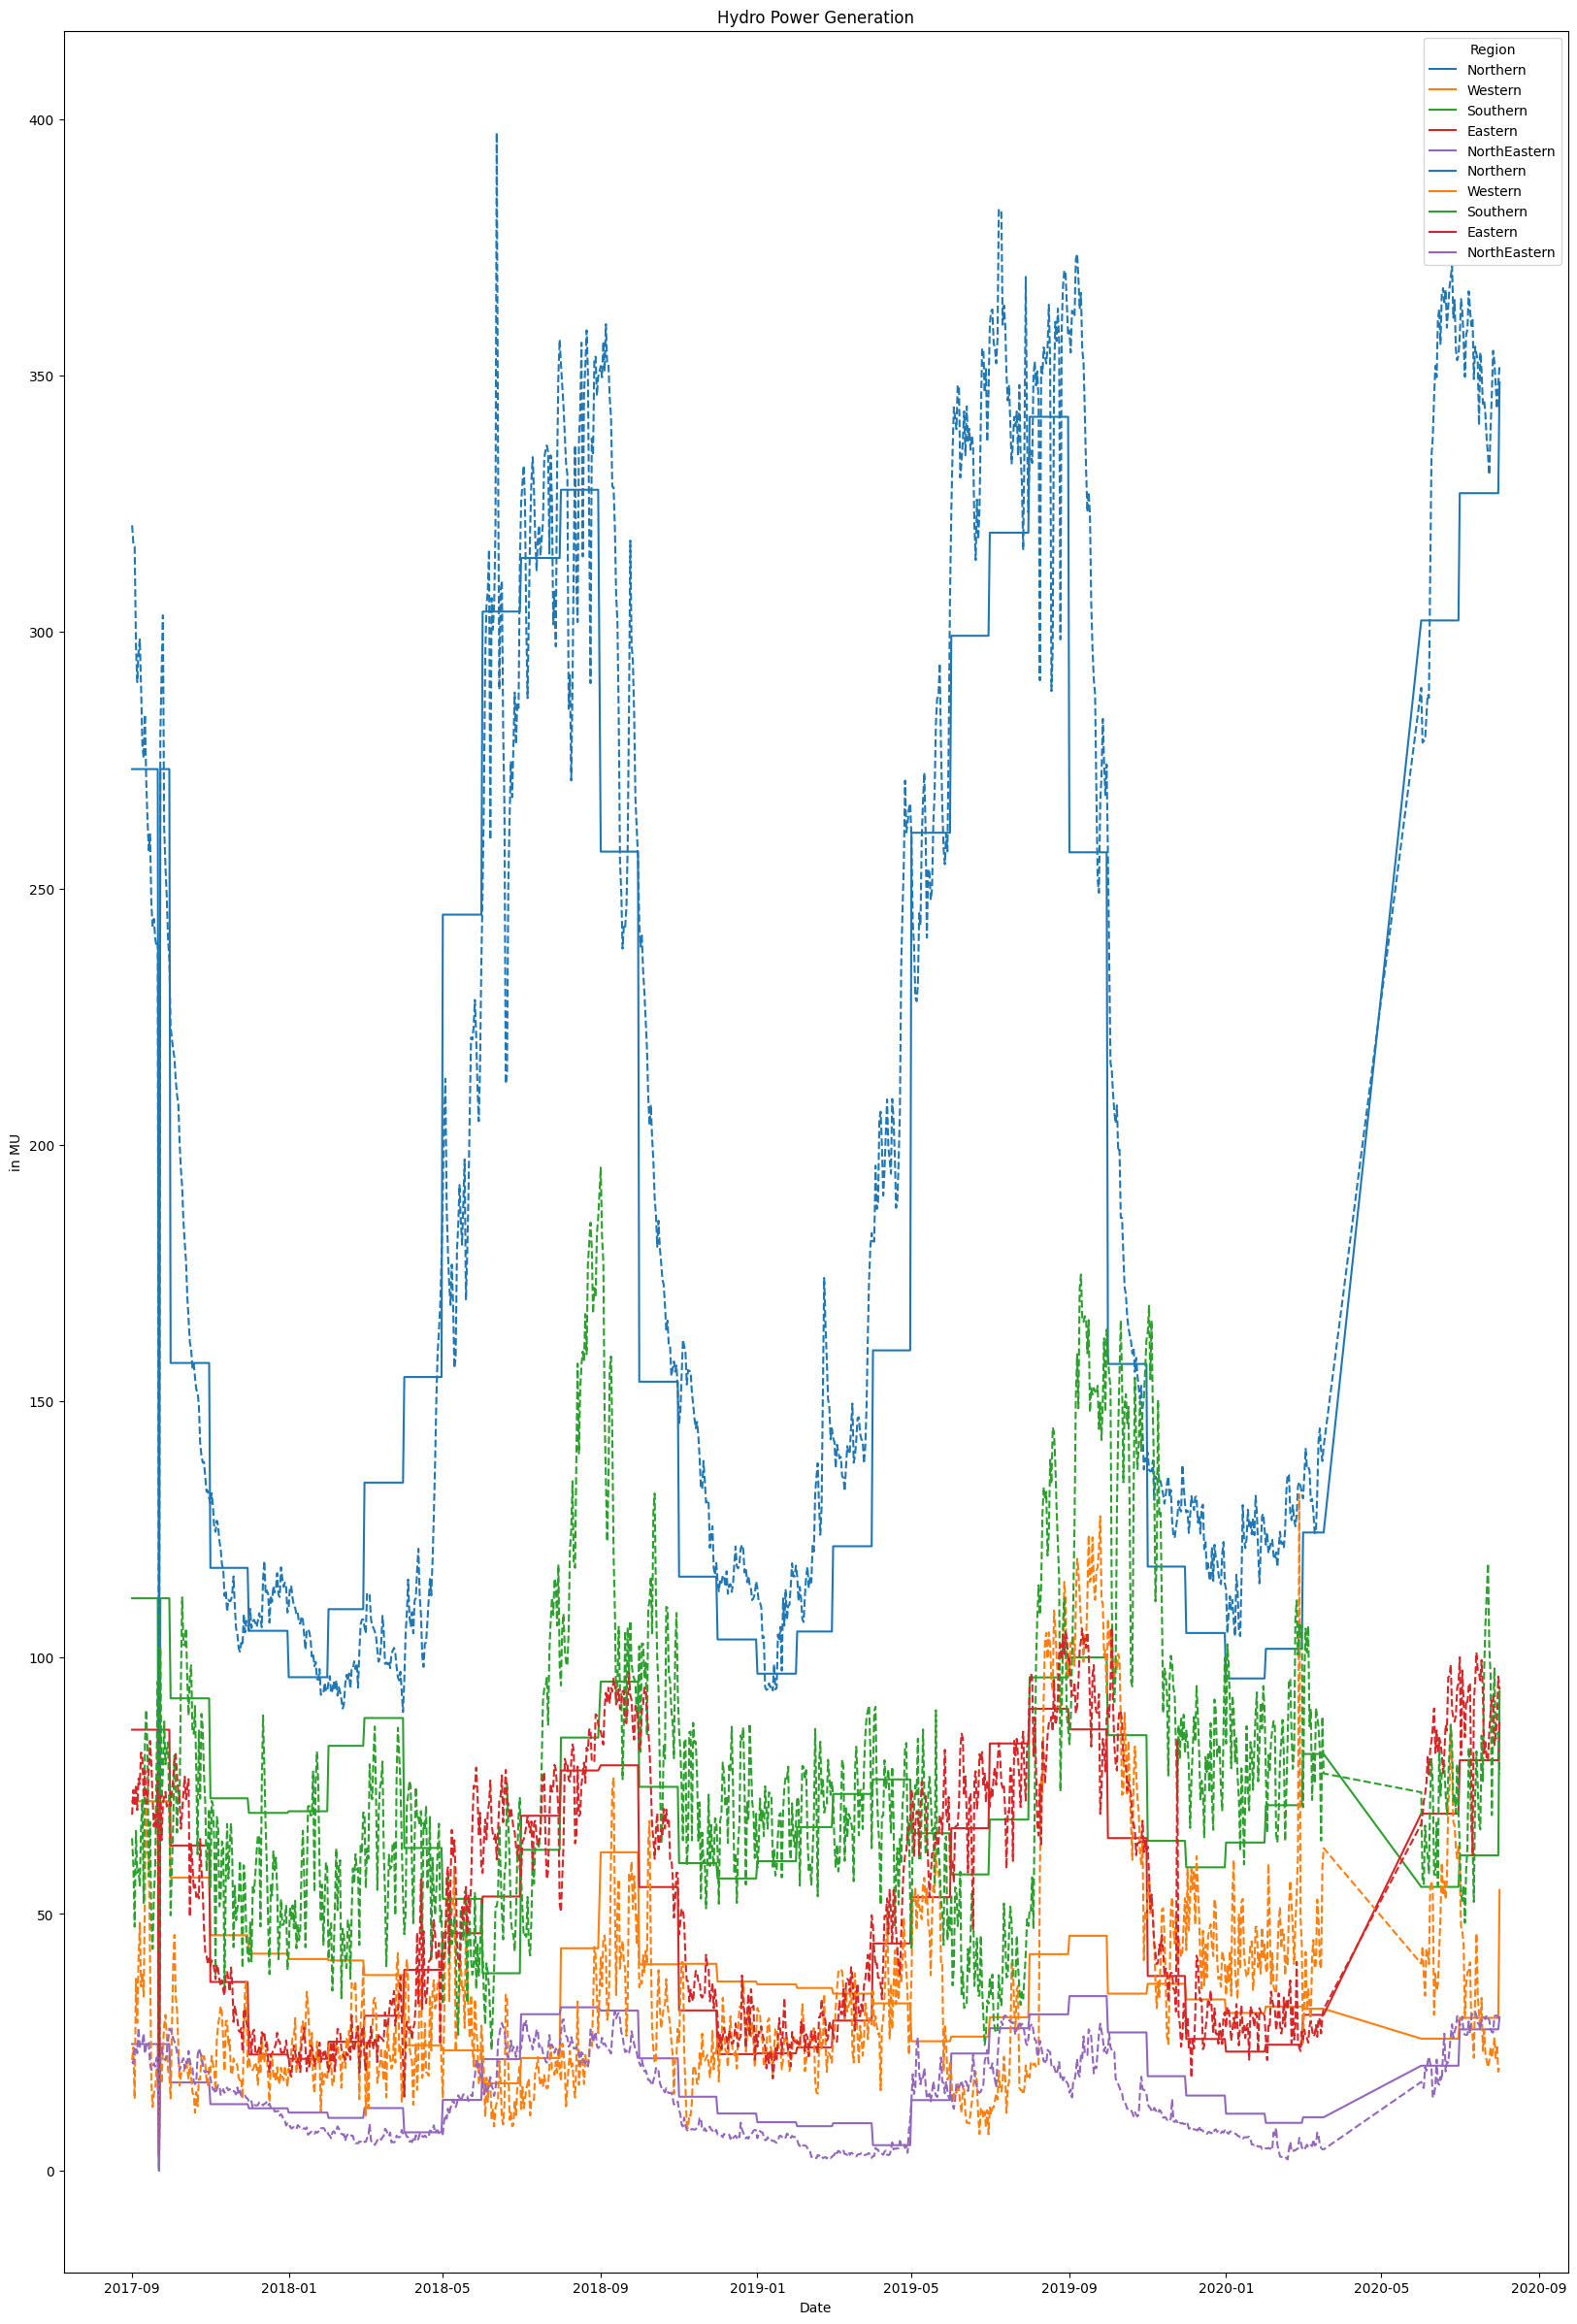

In [29]:
#plotting Hydro Power (Actual and Estimated) with date
plt.figure(figsize=(20,30))
sns.lineplot(data=df,x='Date',y='Hydro Generation Actual (in MU)',ci=False,hue='Region')
sns.lineplot(data=df,x='Date',y="Hydro Generation Estimated (in MU)",ci=False,hue='Region',linestyle='dashed')
plt.ylabel("in MU")
plt.title("Hydro Power Generation")
plt.show();

Northern Region has the highest consumption of Hydro power.  
Hydro Power is generated same for some months as there are straight line in the graph .  
North Eastern Region has the lowest consumption of Hydro Power.  

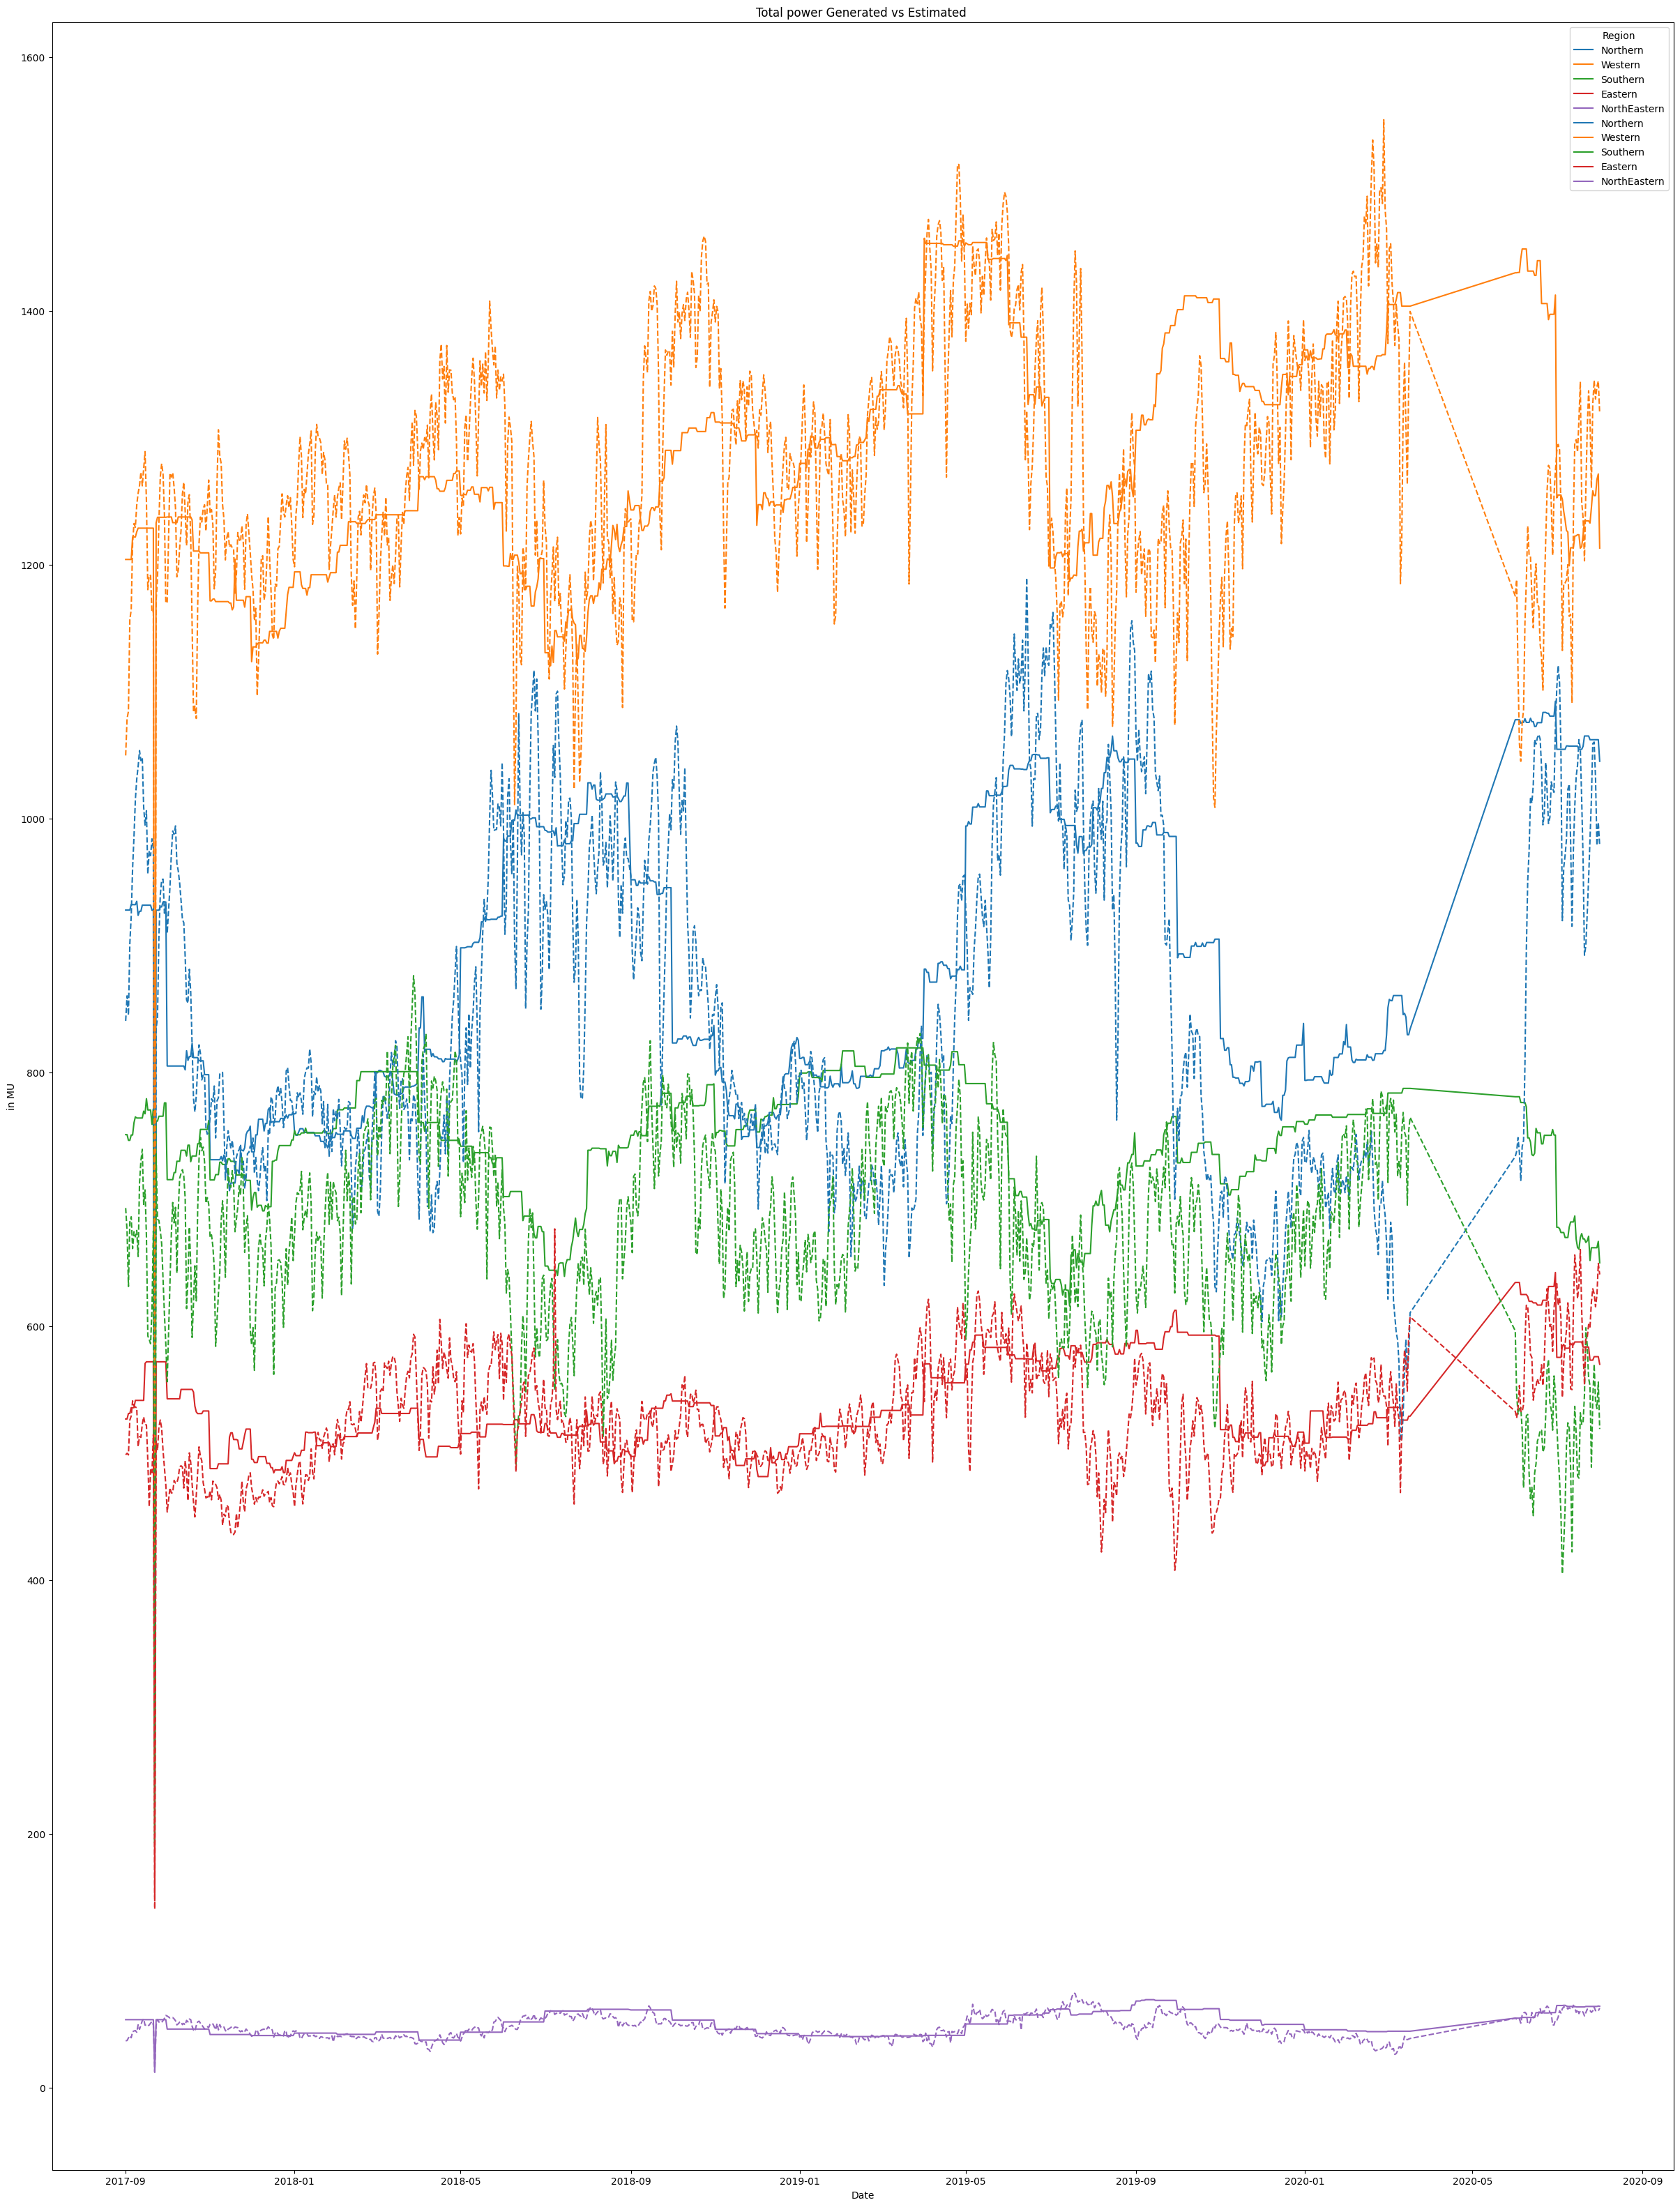

In [30]:
#plotting total power consumption
plt.figure(figsize=(30,40))
sns.lineplot(data=df,x='Date',y='Total Power Actual Generated (in MU)',ci=False,hue='Region')
sns.lineplot(data=df,x='Date',y='Total Power Estimated (in MU)',ci=False,hue='Region',linestyle='dashed')
plt.ylabel("in MU")
plt.title("Total power Generated vs Estimated ")
plt.show();

Western Region has the highest comsumption of electricity .  
North Eastern has the lowest consumption of electricity.

In [31]:
#Dividing the dataset into 5 dataset (Region wise)
df_eastern=df[df['Region']== 'Eastern']
df_northeastern=df[df['Region']== 'NorthEastern']
df_western=df[df['Region']== 'Western']
df_southern=df[df['Region']== 'Southern']
df_northern=df[df['Region']== 'Northern']

In [32]:
#printing few rows from df_eastern
df_eastern

Region  Thermal Generation Actual (in MU)  \
Date                                                     
2017-09-01  Eastern                             441.02   
2017-09-02  Eastern                             441.02   
2017-09-03  Eastern                             445.38   
2017-09-04  Eastern                             445.38   
2017-09-05  Eastern                             449.92   
...             ...                                ...   
2020-07-28  Eastern                             496.03   
2020-07-29  Eastern                             496.03   
2020-07-30  Eastern                             496.03   
2020-07-31  Eastern                             496.03   
2020-08-01  Eastern                             482.86   

            Thermal Generation Estimated (in MU)  \
Date                                               
2017-09-01                                429.39   
2017-09-02                                425.75   
2017-09-03                                427.61   
2017-09-04                                450.85   
2017-09-05                                459.09   
...                                          ...   
2020-07-28                                542.80   
2020-07-29                                529.92   
2020-07-30                                537.09   
2020-07-31                                553.21   
2020-08-01                                547.03   

            Nuclear Generation Actual (in MU)  \
Date                                            
2017-09-01                                0.0   
2017-09-02                                0.0   
2017-09-03                                0.0   
2017-09-04                                0.0   
2017-09-05                                0.0   
...                                       ...   
2020-07-28                                0.0   
2020-07-29                                0.0   
2020-07-30                                0.0   
2020-07-31                                0.0   
2020-08-01                                0.0   

            Nuclear Generation Estimated (in MU)  \
Date                                               
2017-09-01                                   0.0   
2017-09-02                                   0.0   
2017-09-03                                   0.0   
2017-09-04                                   0.0   
2017-09-05                                   0.0   
...                                          ...   
2020-07-28                                   0.0   
2020-07-29                                   0.0   
2020-07-30                                   0.0   
2020-07-31                                   0.0   
2020-08-01                                   0.0   

            Hydro Generation Actual (in MU)  \
Date                                          
2017-09-01                            85.94   
2017-09-02                            85.94   
2017-09-03                            85.94   
2017-09-04                            85.94   
2017-09-05                            85.94   
...                                     ...   
2020-07-28                            80.00   
2020-07-29                            80.00   
2020-07-30                            80.00   
2020-07-31                            80.00   
2020-08-01                            87.22   

            Hydro Generation Estimated (in MU)  \
Date                                             
2017-09-01                               69.36   
2017-09-02                               74.18   
2017-09-03                               71.05   
2017-09-04                               75.21   
2017-09-05                               70.29   
...                                        ...   
2020-07-28                               82.94   
2020-07-29                               85.44   
2020-07-30                               87.26   
2020-07-31                               96.30   
2020-08-01                               93.78   

   

In [33]:
#printing few rows from df_western
df_western

Region  Thermal Generation Actual (in MU)  \
Date                                                     
2017-09-01  Western                            1106.89   
2017-09-02  Western                            1106.89   
2017-09-03  Western                            1106.89   
2017-09-04  Western                            1106.89   
2017-09-05  Western                            1106.89   
...             ...                                ...   
2020-07-28  Western                            1182.24   
2020-07-29  Western                            1182.24   
2020-07-30  Western                            1194.97   
2020-07-31  Western                            1199.28   
2020-08-01  Western                            1116.00   

            Thermal Generation Estimated (in MU)  \
Date                                               
2017-09-01                               1024.33   
2017-09-02                               1050.91   
2017-09-03                               1066.73   
2017-09-04                               1115.43   
2017-09-05                               1131.78   
...                                          ...   
2020-07-28                               1282.43   
2020-07-29                               1271.90   
2020-07-30                               1279.02   
2020-07-31                               1288.65   
2020-08-01                               1262.10   

            Nuclear Generation Actual (in MU)  \
Date                                            
2017-09-01                              25.17   
2017-09-02                              25.17   
2017-09-03                              25.17   
2017-09-04                              25.17   
2017-09-05                              25.17   
...                                       ...   
2020-07-28                              42.37   
2020-07-29                              42.37   
2020-07-30                              42.37   
2020-07-31                              42.37   
2020-08-01                              42.37   

            Nuclear Generation Estimated (in MU)  \
Date                                               
2017-09-01                                  3.81   
2017-09-02                                  3.83   
2017-09-03                                  3.80   
2017-09-04                                  3.81   
2017-09-05                                  3.83   
...                                          ...   
2020-07-28                                 36.80   
2020-07-29                                 36.65   
2020-07-30                                 36.62   
2020-07-31                                 36.68   
2020-08-01                                 36.63   

            Hydro Generation Actual (in MU)  \
Date                                          
2017-09-01                            72.00   
2017-09-02                            72.00   
2017-09-03                            72.00   
2017-09-04                            72.00   
2017-09-05                            72.00   
...                                     ...   
2020-07-28                            29.75   
2020-07-29                            29.75   
2020-07-30                            29.75   
2020-07-31                            29.75   
2020-08-01                            54.67   

            Hydro Generation Estimated (in MU)  \
Date                                             
2017-09-01                               21.53   
2017-09-02                               23.97   
2017-09-03                               13.94   
2017-09-04                               37.38   
2017-09-05                               28.78   
...                                        ...   
2020-07-28                               25.94   
2020-07-29                               21.91   
2020-07-30                               24.46   
2020-07-31                               19.26   
2020-08-01                               20.28   

   

In [34]:
#printing few rows from df_northeastern
df_northeastern

Region  Thermal Generation Actual (in MU)  \
Date                                                          
2017-09-01  NorthEastern                              29.11   
2017-09-02  NorthEastern                              29.11   
2017-09-03  NorthEastern                              29.11   
2017-09-04  NorthEastern                              29.11   
2017-09-05  NorthEastern                              29.11   
...                  ...                                ...   
2020-07-28  NorthEastern                              36.65   
2020-07-29  NorthEastern                              36.65   
2020-07-30  NorthEastern                              36.65   
2020-07-31  NorthEastern                              36.98   
2020-08-01  NorthEastern                              34.42   

            Thermal Generation Estimated (in MU)  \
Date                                               
2017-09-01                                 15.91   
2017-09-02                                 16.50   
2017-09-03                                 15.52   
2017-09-04                                 16.85   
2017-09-05                                 16.64   
...                                          ...   
2020-07-28                                 33.55   
2020-07-29                                 30.63   
2020-07-30                                 30.86   
2020-07-31                                 30.94   
2020-08-01                                 32.81   

            Nuclear Generation Actual (in MU)  \
Date                                            
2017-09-01                                0.0   
2017-09-02                                0.0   
2017-09-03                                0.0   
2017-09-04                                0.0   
2017-09-05                                0.0   
...                                       ...   
2020-07-28                                0.0   
2020-07-29                                0.0   
2020-07-30                                0.0   
2020-07-31                                0.0   
2020-08-01                                0.0   

            Nuclear Generation Estimated (in MU)  \
Date                                               
2017-09-01                                   0.0   
2017-09-02                                   0.0   
2017-09-03                                   0.0   
2017-09-04                                   0.0   
2017-09-05                                   0.0   
...                                          ...   
2020-07-28                                   0.0   
2020-07-29                                   0.0   
2020-07-30                                   0.0   
2020-07-31                                   0.0   
2020-08-01                                   0.0   

            Hydro Generation Actual (in MU)  \
Date                                          
2017-09-01                            24.64   
2017-09-02                            24.64   
2017-09-03                            24.64   
2017-09-04                            24.64   
2017-09-05                            24.64   
...                                     ...   
2020-07-28                            27.51   
2020-07-29                            27.51   
2020-07-30                            27.51   
2020-07-31                            27.51   
2020-08-01                            29.87   

            Hydro Generation Estimated (in MU)  \
Date                                             
2017-09-01                               21.21   
2017-09-02                               20.81   
2017-09-03                               23.84   
2017-09-04                               24.10   
2017-09-05                               22.86   
...                                        ...   
2020-07-28                               30.08   
2020-07-29                               30.19   
2020-07-30                               30.20   
2020-07-31                               29.

In [35]:
#printing few rows from df_northern
df_northern

Region  Thermal Generation Actual (in MU)  \
Date                                                      
2017-09-01  Northern                             624.23   
2017-09-02  Northern                             624.23   
2017-09-03  Northern                             624.23   
2017-09-04  Northern                             624.23   
2017-09-05  Northern                             628.58   
...              ...                                ...   
2020-07-28  Northern                             708.11   
2020-07-29  Northern                             708.11   
2020-07-30  Northern                             708.11   
2020-07-31  Northern                             708.11   
2020-08-01  Northern                             669.47   

            Thermal Generation Estimated (in MU)  \
Date                                               
2017-09-01                                484.21   
2017-09-02                                507.42   
2017-09-03                                492.69   
2017-09-04                                568.34   
2017-09-05                                597.08   
...                                          ...   
2020-07-28                                680.40   
2020-07-29                                655.40   
2020-07-30                                612.32   
2020-07-31                                625.88   
2020-08-01                                602.96   

            Nuclear Generation Actual (in MU)  \
Date                                            
2017-09-01                              30.36   
2017-09-02                              30.36   
2017-09-03                              30.36   
2017-09-04                              30.36   
2017-09-05                              30.36   
...                                       ...   
2020-07-28                              26.88   
2020-07-29                              26.88   
2020-07-30                              26.88   
2020-07-31                              26.88   
2020-08-01                              26.88   

            Nuclear Generation Estimated (in MU)  \
Date                                               
2017-09-01                                 35.57   
2017-09-02                                 35.69   
2017-09-03                                 35.65   
2017-09-04                                 35.62   
2017-09-05                                 35.72   
...                                          ...   
2020-07-28                                 27.16   
2020-07-29                                 28.23   
2020-07-30                                 22.77   
2020-07-31                                 22.78   
2020-08-01                                 23.41   

            Hydro Generation Actual (in MU)  \
Date                                          
2017-09-01                           273.27   
2017-09-02                           273.27   
2017-09-03                           273.27   
2017-09-04                           273.27   
2017-09-05                           273.27   
...                                     ...   
2020-07-28                           327.08   
2020-07-29                           327.08   
2020-07-30                           327.08   
2020-07-31                           327.08   
2020-08-01                           348.72   

            Hydro Generation Estimated (in MU)  \
Date                                             
2017-09-01                              320.81   
2017-09-02                              317.19   
2017-09-03                              316.69   
2017-09-04                              297.47   
2017-09-05                              290.23   
...                                        ...   
2020-07-28                              352.65   
2020-07-29                              348.00   
2020-07-30                              343.59   
2020-07-31                              348.39   
2020-08-01                              35

In [36]:
#printing few rows from df_southern
df_southern

Region  Thermal Generation Actual (in MU)  \
Date                                                      
2017-09-01  Southern                             576.66   
2017-09-02  Southern                             576.66   
2017-09-03  Southern                             572.16   
2017-09-04  Southern                             572.16   
2017-09-05  Southern                             576.35   
...              ...                                ...   
2020-07-28  Southern                             538.60   
2020-07-29  Southern                             538.60   
2020-07-30  Southern                             538.60   
2020-07-31  Southern                             543.60   
2020-08-01  Southern                             494.66   

            Thermal Generation Estimated (in MU)  \
Date                                               
2017-09-01                                578.55   
2017-09-02                                562.79   
2017-09-03                                530.68   
2017-09-04                                562.81   
2017-09-05                                575.06   
...                                          ...   
2020-07-28                                446.86   
2020-07-29                                431.01   
2020-07-30                                424.59   
2020-07-31                                444.43   
2020-08-01                                415.53   

            Nuclear Generation Actual (in MU)  \
Date                                            
2017-09-01                              62.73   
2017-09-02                              62.73   
2017-09-03                              62.73   
2017-09-04                              62.73   
2017-09-05                              62.73   
...                                       ...   
2020-07-28                              61.83   
2020-07-29                              61.83   
2020-07-30                              61.83   
2020-07-31                              61.83   
2020-08-01                              61.83   

            Nuclear Generation Estimated (in MU)  \
Date                                               
2017-09-01                                 49.80   
2017-09-02                                 52.76   
2017-09-03                                 53.12   
2017-09-04                                 53.19   
2017-09-05                                 53.16   
...                                          ...   
2020-07-28                                 25.36   
2020-07-29                                 25.40   
2020-07-30                                 26.25   
2020-07-31                                 26.21   
2020-08-01                                 26.28   

            Hydro Generation Actual (in MU)  \
Date                                          
2017-09-01                           111.57   
2017-09-02                           111.57   
2017-09-03                           111.57   
2017-09-04                           111.57   
2017-09-05                           111.57   
...                                     ...   
2020-07-28                            61.43   
2020-07-29                            61.43   
2020-07-30                            61.43   
2020-07-31                            61.43   
2020-08-01                            93.49   

            Hydro Generation Estimated (in MU)  \
Date                                             
2017-09-01                               64.78   
2017-09-02                               59.49   
2017-09-03                               47.53   
2017-09-04                               66.20   
2017-09-05                               58.00   
...                                        ...   
2020-07-28                               97.89   
2020-07-29                               84.27   
2020-07-30                               84.27   
2020-07-31                               85.42   
2020-08-01                               7

### Seasonal Decompose of Time Series

In [37]:
#decomposition function the time series additive
def seasonal_decompose_additive(region,title):
    for column in region[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']]:
                          df_region_add_decompose=seasonal_decompose(region[column],model='additive',period=12)
                          df_region_add_decompose.plot()
                          plt.title(title)
                          plt.show();
    

In [38]:
#decomposition function the time series multiplicative
def seasonal_decompose_multiplicative(region,title):
    for column in region[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']]:
                          df_region_mul_decompose=seasonal_decompose(region[column],model='multiplicative',period=12)
                          df_region_mul_decompose.plot()
                          plt.title(title)
                          plt.show();

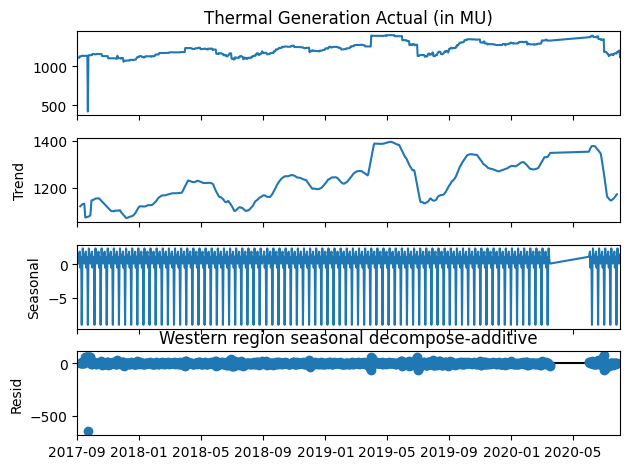

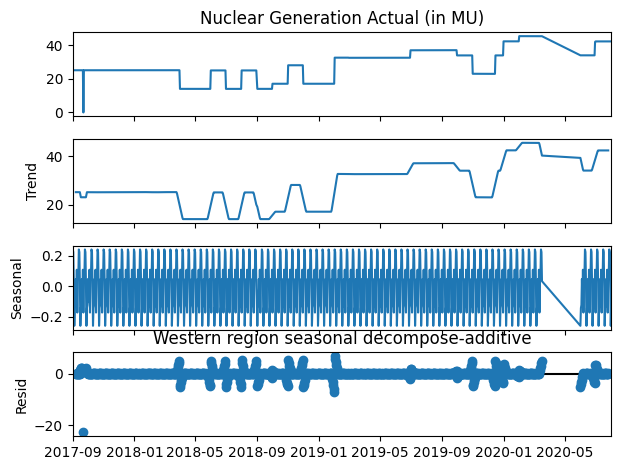

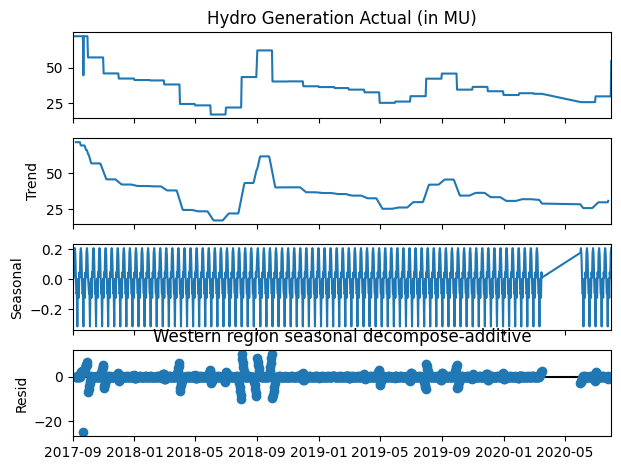

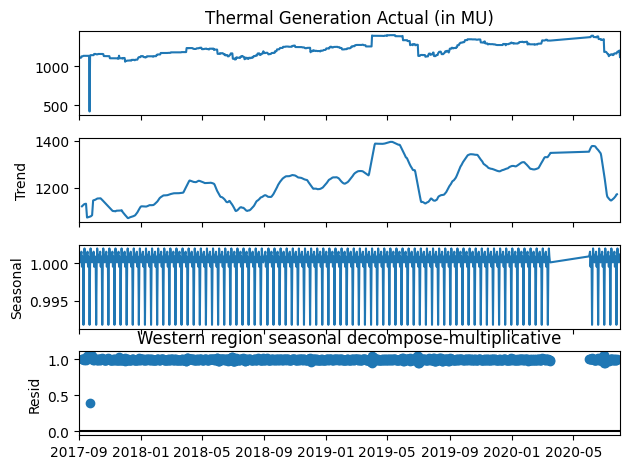

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [39]:
#Seasonal decomposition of Western Region
seasonal_decompose_additive(df_western,"Western region seasonal decompose-additive")
seasonal_decompose_multiplicative(df_western,"Western region seasonal decompose-multiplicative")

In [ ]:
#Seasonal decomposition of Northern Region
seasonal_decompose_additive(df_northern,"Northern region seasonal decompose-additive")
seasonal_decompose_multiplicative(df_northern,"Northern region seasonal decompose-multiplicative")

In [ ]:
#Seasonal decomposition of Southern Region
seasonal_decompose_additive(df_southern,"Southern region seasonal decompose-additive")
seasonal_decompose_multiplicative(df_southern,"Southern region seasonal decompose-multiplicative")

In [ ]:
#Seasonal decomposition of North Eastern Region
seasonal_decompose_additive(df_northeastern,"North Eastern region seasonal decompose-additive")
seasonal_decompose_multiplicative(df_northeastern,"North Eastern region seasonal decompose-multiplicative")

In [ ]:
#Seasonal decomposition of Eastern Region
seasonal_decompose_additive(df_eastern,"Eastern region seasonal decompose-additive")

Observations:Df-Eastern-There are no trend present in additive model.  
There is seasonality present  in thermal generation.    
Trend and seasonality both are present in Hydro Generation.

In [ ]:
#Multiplicative seasonality is not appropriate for zero and negative values.
#So removing Nuclear Generation from multiplicative seasonal decompose
for column in df_eastern[['Thermal Generation Actual (in MU)','Hydro Generation Actual (in MU)']]:
                          df_eastern_mul_decompose=seasonal_decompose(df_eastern[column],model='multiplicative',period=12)
                          df_eastern_mul_decompose.plot()
                          plt.show();

Observations:Df-Eastern-There are no trend present in multiplicative model.  
There is seasonality present in thermal generation.    
Trend and seasonality both are present in Hydro Generation.  
Residual Error is less fluctuating in additive .  
So the model must be additive.

 Multiplicative seasonality is not appropriate for zero and negative values-as there are no reading for Nuclear generation in Eastern Region

### Plotting Boxplot to detect Outliers

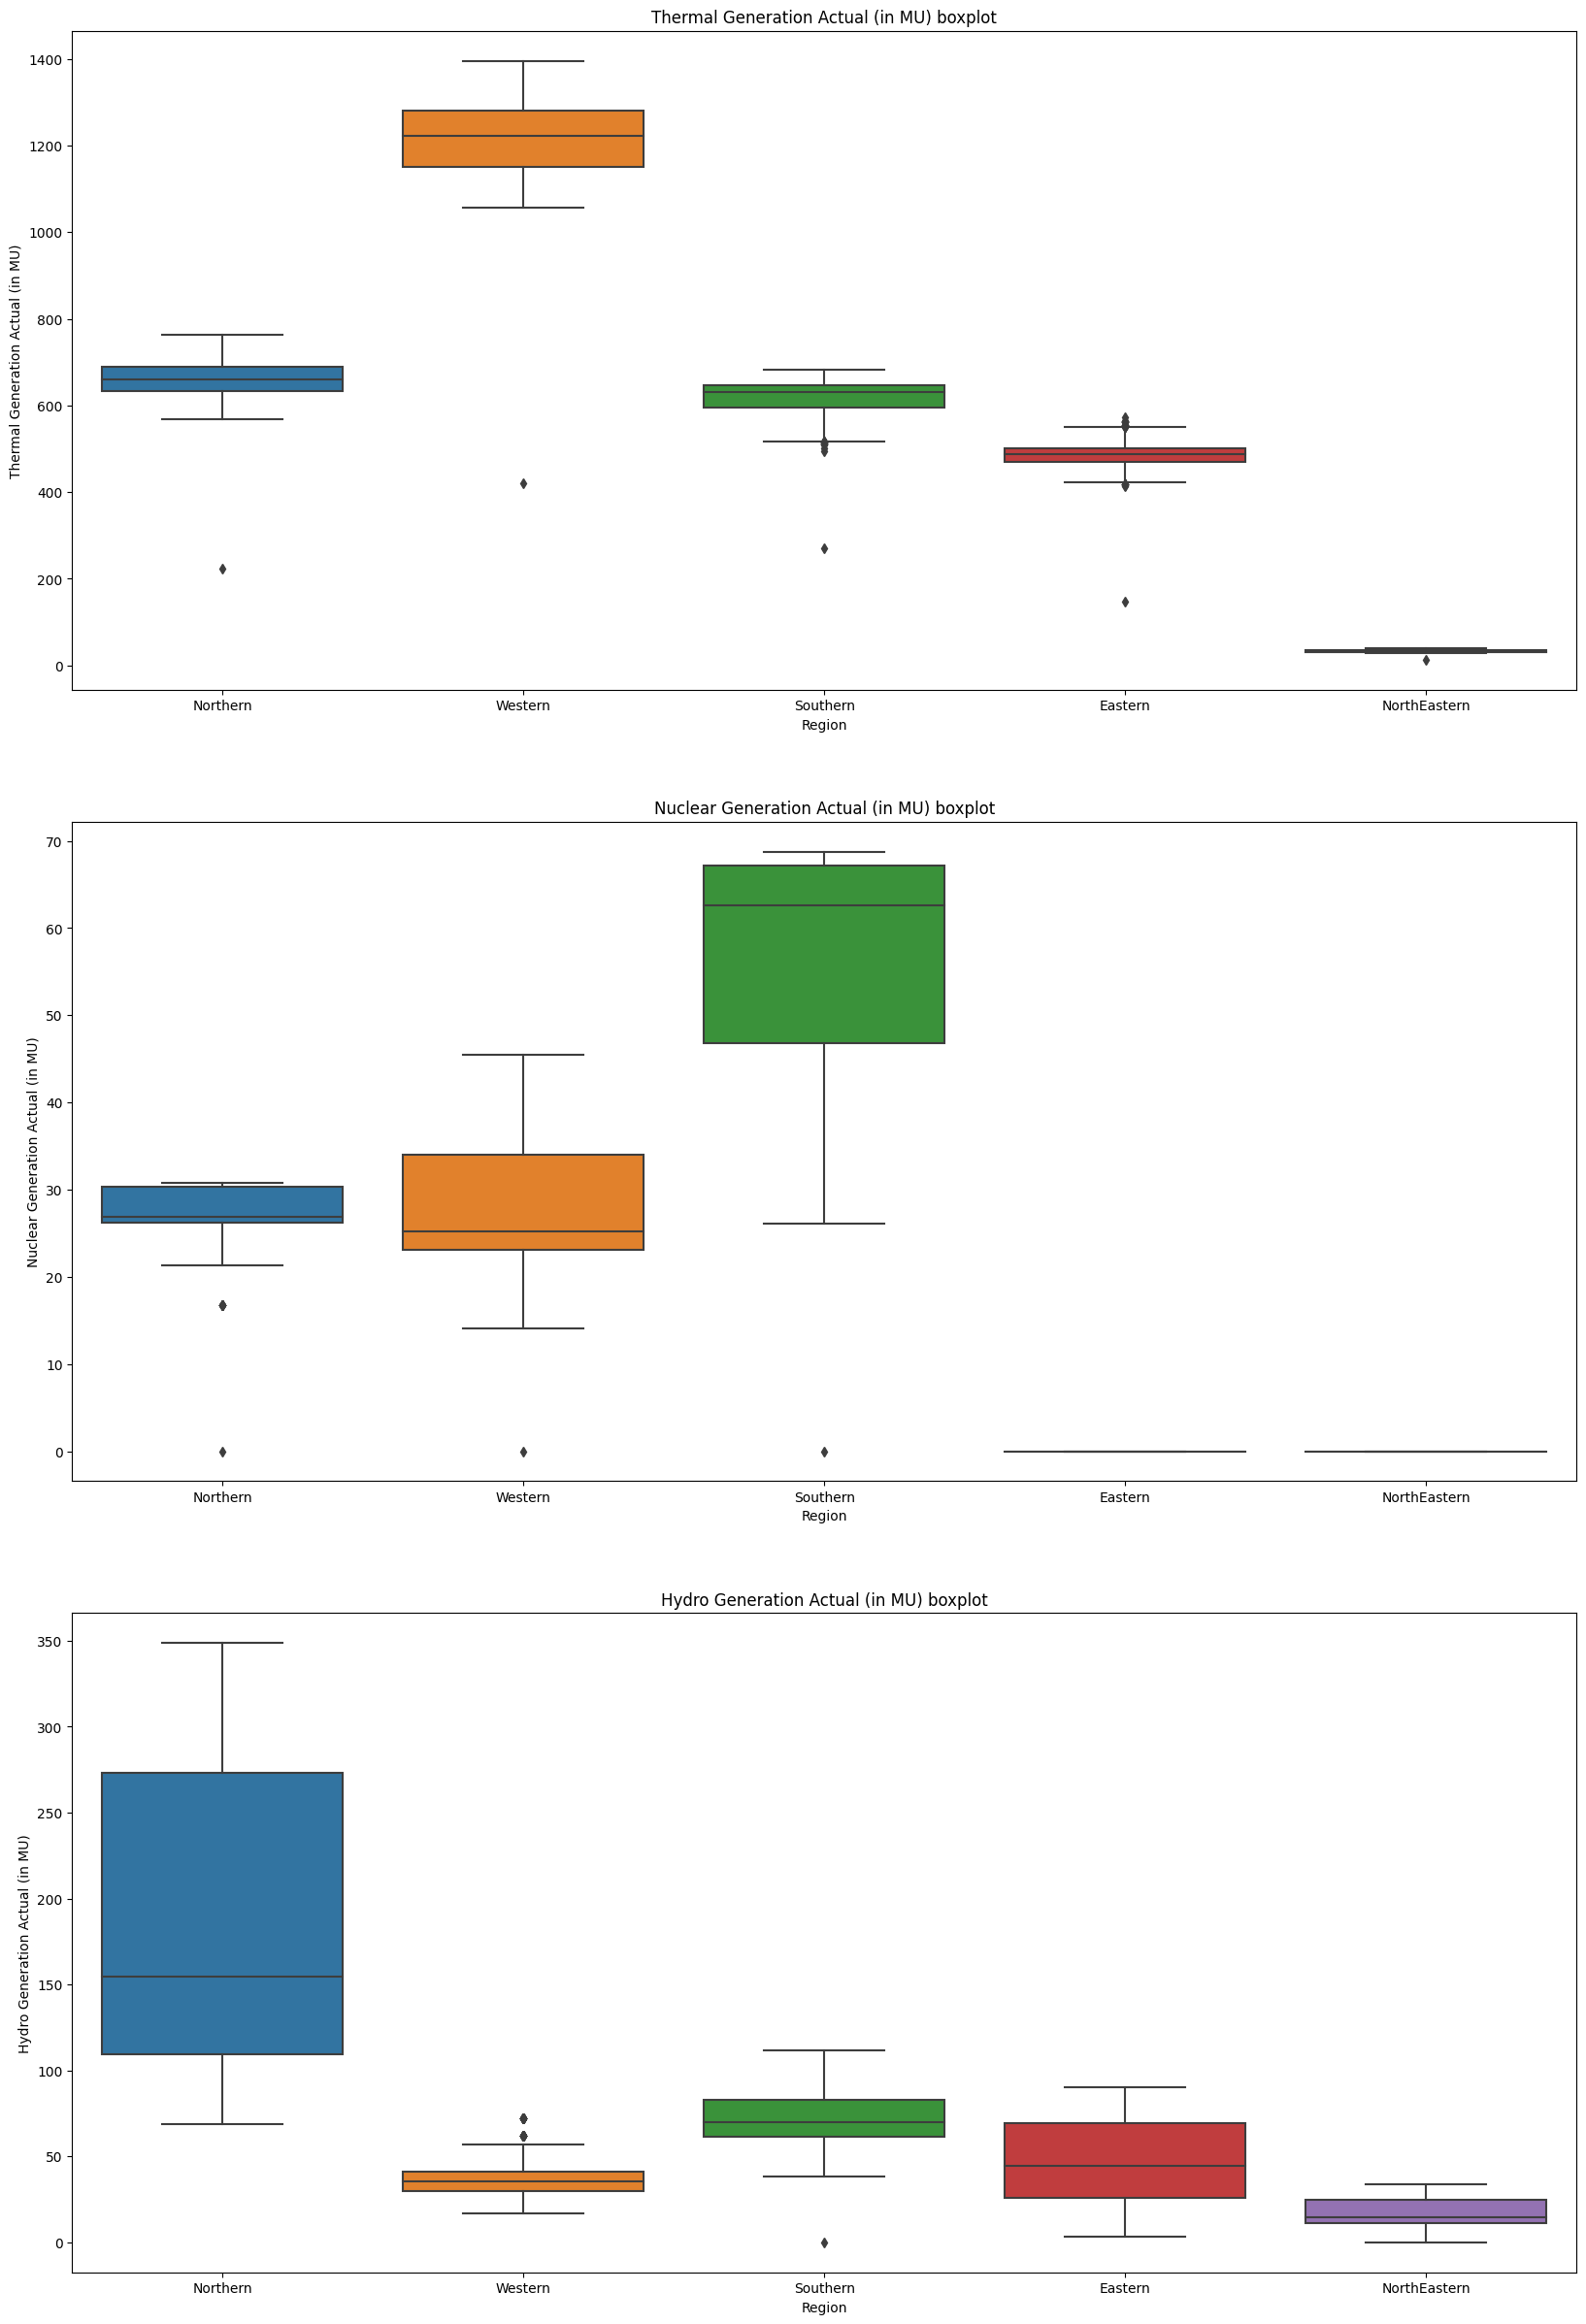

In [40]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
sns.boxplot(data=df,x='Region',y='Thermal Generation Actual (in MU)')
plt.title("Thermal Generation Actual (in MU) boxplot")
plt.subplot(3,1,2)
sns.boxplot(data=df,x='Region',y='Nuclear Generation Actual (in MU)')
plt.title("Nuclear Generation Actual (in MU) boxplot")
plt.subplot(3,1,3)
sns.boxplot(data=df,x='Region',y='Hydro Generation Actual (in MU)')
plt.title("Hydro Generation Actual (in MU) boxplot")
plt.show();

There are outliers in each and every boxplot.

In [41]:
#defining a function to calculate lower range and upper range
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [42]:
for i in [df_eastern,df_western,df_northern,df_southern,df_northeastern]:
    for column in df_eastern[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)',]]:
        lr,ur=remove_outlier (i[column])
        i[column]=np.where(i[column]>ur,ur,i[column])
        i[column]=np.where(i[column]<lr,lr,i[column])

In [43]:
#concatinating region wise dataset
df_region=pd.concat([df_northern,df_western,df_southern,df_eastern,df_northeastern],axis=0)

In [44]:
df_region

Region  Thermal Generation Actual (in MU)  \
Date                                                          
2017-09-01      Northern                             624.23   
2017-09-02      Northern                             624.23   
2017-09-03      Northern                             624.23   
2017-09-04      Northern                             624.23   
2017-09-05      Northern                             628.58   
...                  ...                                ...   
2020-07-28  NorthEastern                              36.65   
2020-07-29  NorthEastern                              36.65   
2020-07-30  NorthEastern                              36.65   
2020-07-31  NorthEastern                              36.98   
2020-08-01  NorthEastern                              34.42   

            Thermal Generation Estimated (in MU)  \
Date                                               
2017-09-01                                484.21   
2017-09-02                                507.42   
2017-09-03                                492.69   
2017-09-04                                568.34   
2017-09-05                                597.08   
...                                          ...   
2020-07-28                                 33.55   
2020-07-29                                 30.63   
2020-07-30                                 30.86   
2020-07-31                                 30.94   
2020-08-01                                 32.81   

            Nuclear Generation Actual (in MU)  \
Date                                            
2017-09-01                              30.36   
2017-09-02                              30.36   
2017-09-03                              30.36   
2017-09-04                              30.36   
2017-09-05                              30.36   
...                                       ...   
2020-07-28                               0.00   
2020-07-29                               0.00   
2020-07-30                               0.00   
2020-07-31                               0.00   
2020-08-01                               0.00   

            Nuclear Generation Estimated (in MU)  \
Date                                               
2017-09-01                                 35.57   
2017-09-02                                 35.69   
2017-09-03                                 35.65   
2017-09-04                                 35.62   
2017-09-05                                 35.72   
...                                          ...   
2020-07-28                                  0.00   
2020-07-29                                  0.00   
2020-07-30                                  0.00   
2020-07-31                                  0.00   
2020-08-01                                  0.00   

            Hydro Generation Actual (in MU)  \
Date                                          
2017-09-01                           273.27   
2017-09-02                           273.27   
2017-09-03                           273.27   
2017-09-04                           273.27   
2017-09-05                           273.27   
...                                     ...   
2020-07-28                            27.51   
2020-07-29                            27.51   
2020-07-30                            27.51   
2020-07-31                            27.51   
2020-08-01                            29.87   

            Hydro Generation Estimated (in MU)  \
Date                                             
2017-09-01                              320.81   
2017-09-02                              317.19   
2017-09-03                              316.69   
2017-09-04                              297.47   
2017-09-05                              290.23   
...                                        ...   
2020-07-28                               30.08   
2020-07-29                               30.19   
2020-07-30                               30.20   
2020-07-31                               29.

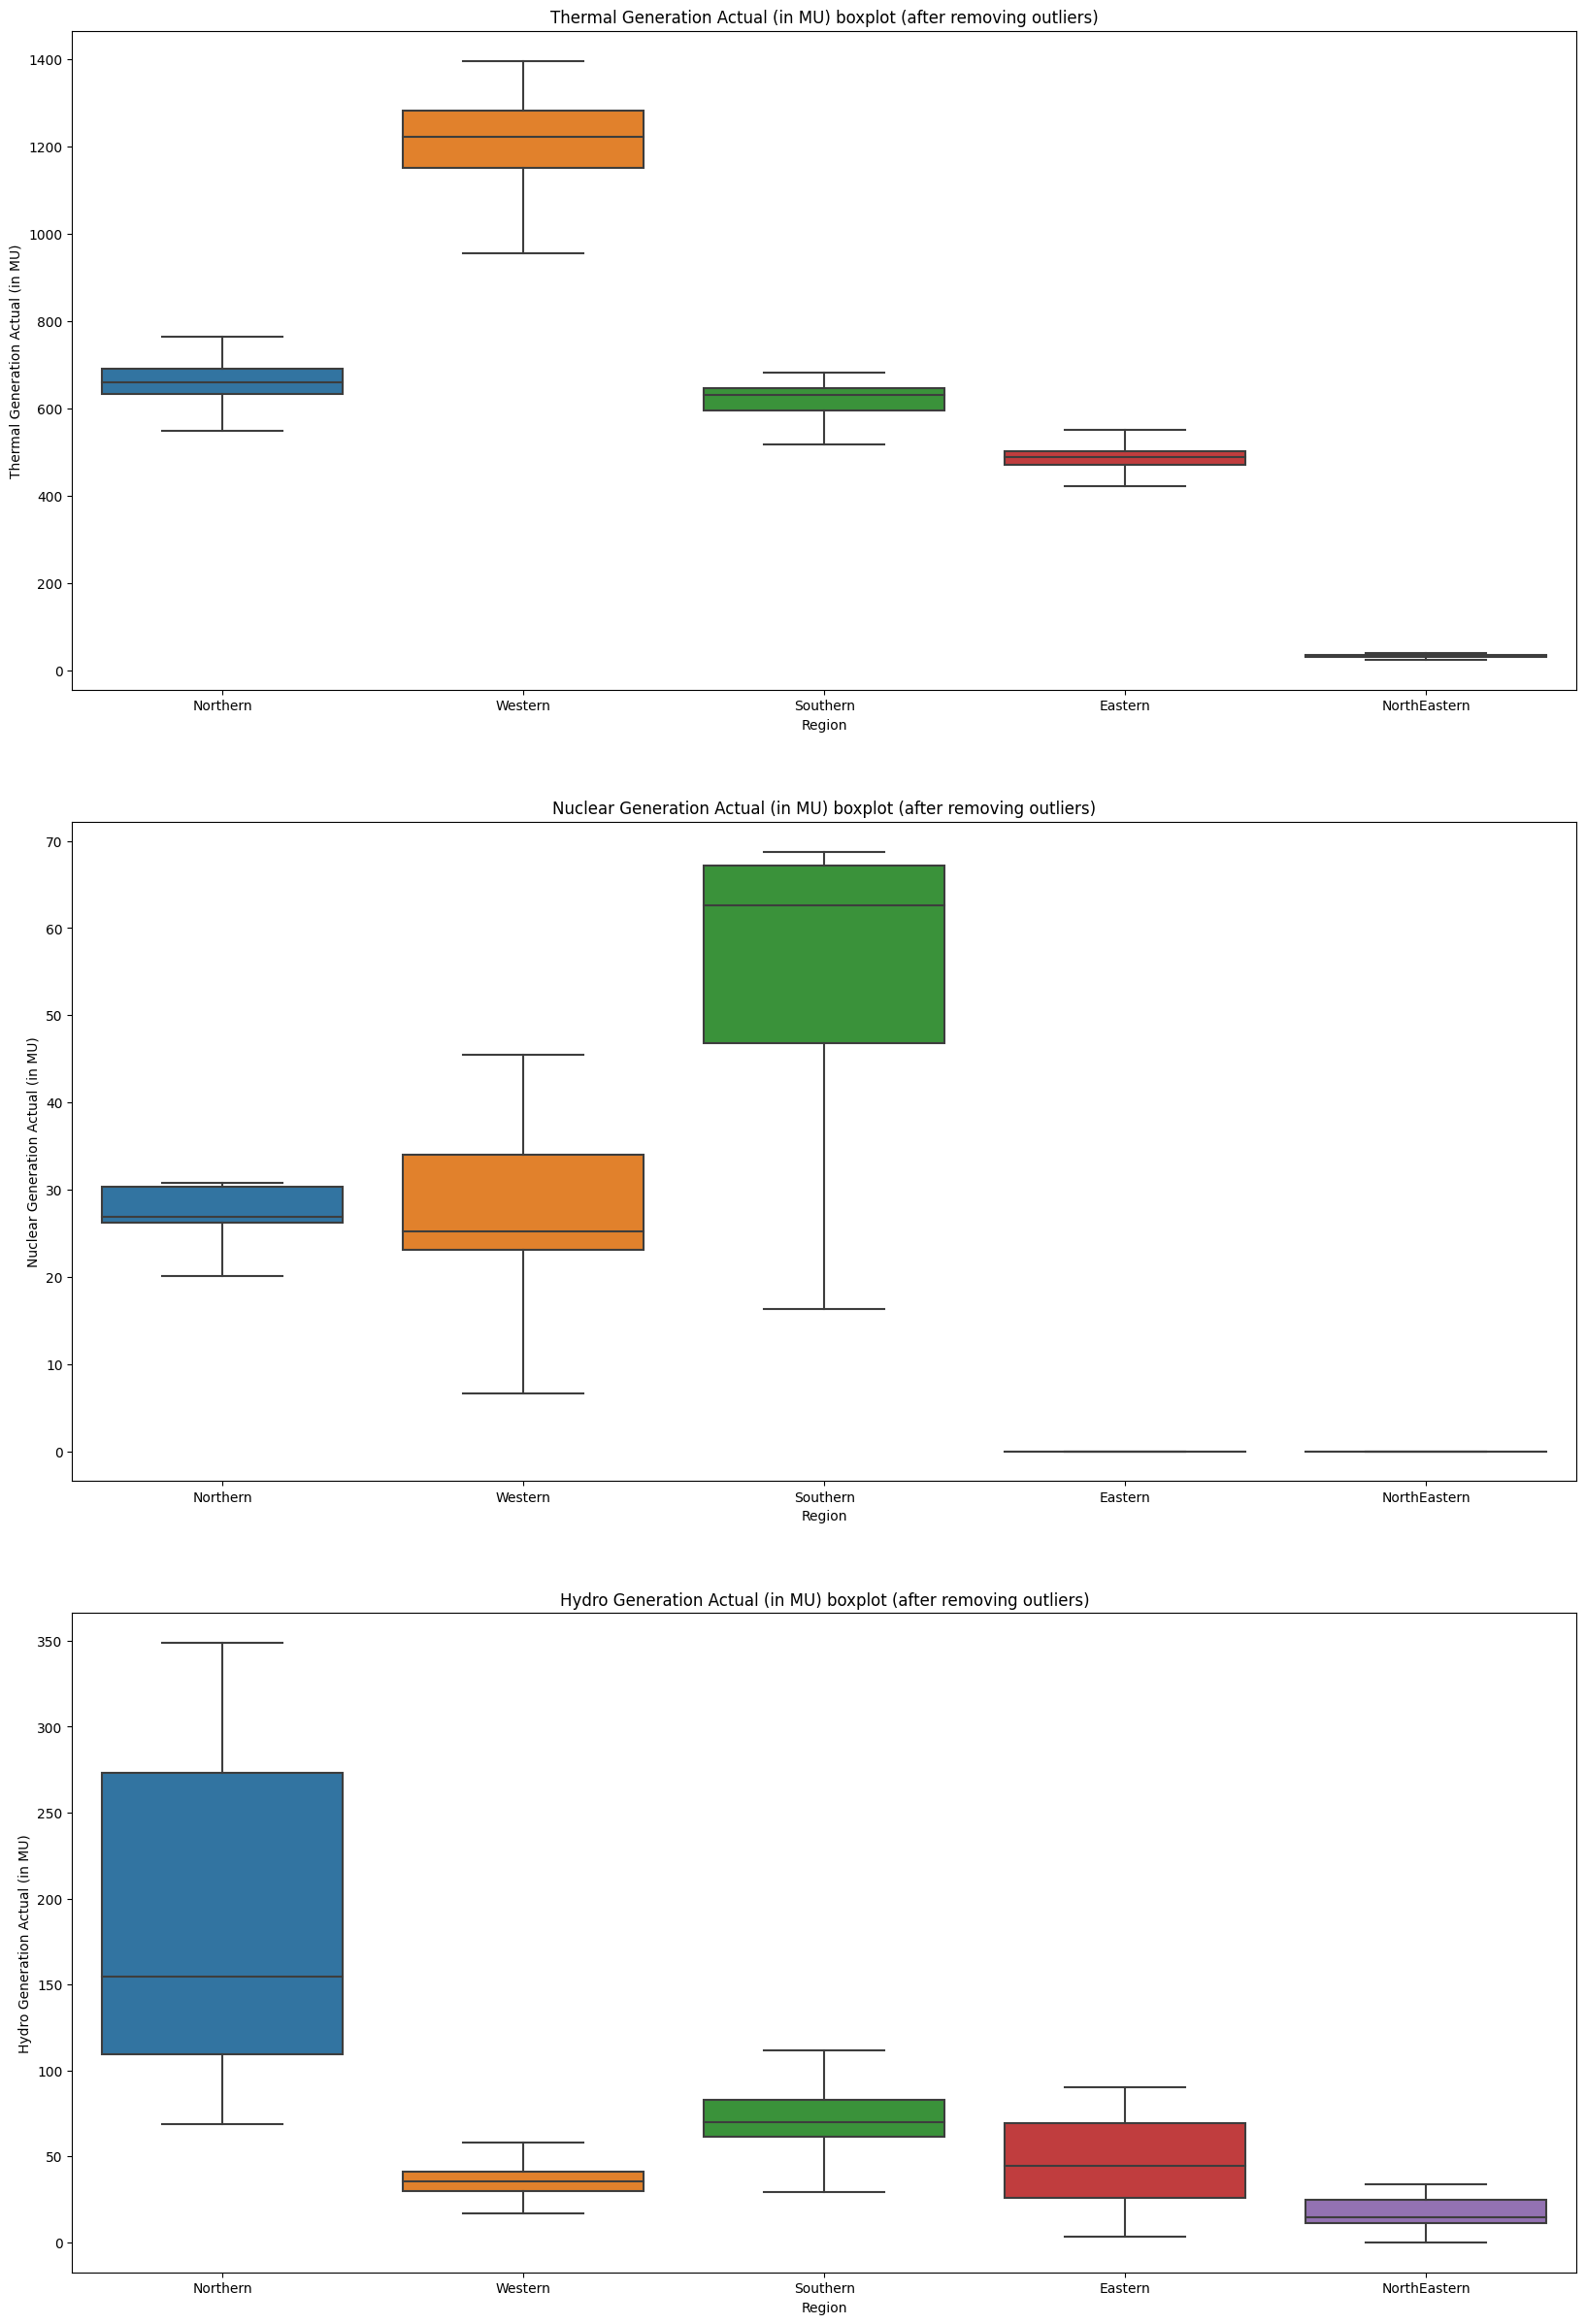

In [45]:
#plotting a graph without outliers
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
sns.boxplot(data=df_region,x='Region',y='Thermal Generation Actual (in MU)')
plt.title("Thermal Generation Actual (in MU) boxplot (after removing outliers)")
plt.subplot(3,1,2)
sns.boxplot(data=df_region,x='Region',y='Nuclear Generation Actual (in MU)')
plt.title("Nuclear Generation Actual (in MU) boxplot (after removing outliers)")
plt.subplot(3,1,3)
sns.boxplot(data=df_region,x='Region',y='Hydro Generation Actual (in MU)')
plt.title("Hydro Generation Actual (in MU) boxplot (after removing outliers)")
plt.show();

## Train Test Split

Let us take the test set from 2020 jan and train set till 2019 dec.

In [46]:
#Creating Region wise test and train dataframe 
df_eastern_test=df_eastern[df_eastern.index>"1-1-2020"]
df_western_test=df_western[df_western.index>"1-1-2020"]
df_northern_test=df_northern[df_northern.index>"1-1-2020"]
df_southern_test=df_southern[df_southern.index>"1-1-2020"]
df_northeastern_test=df_northeastern[df_northeastern.index>"1-1-2020"]
df_eastern_train=df_eastern[df_eastern.index<"1-1-2020"]
df_western_train=df_western[df_western.index<"1-1-2020"]
df_northern_train=df_northern[df_northern.index<"1-1-2020"]
df_southern_train=df_southern[df_southern.index<"1-1-2020"]
df_northeastern_train=df_northeastern[df_northeastern.index<"1-1-2020"]

In [47]:
#Shape of Test and  Train Dataset
print('Test Data Regionwise')
for i in (df_eastern_test,df_western_test,df_northern_test,df_southern_test,df_northeastern_test):
    print('dataset :',i.shape)
print('Train Data Regionwise')
for i in (df_eastern_train,df_western_train,df_northern_train,df_southern_train,df_northeastern_train):
    print('dataset:',i.shape)

Test Data Regionwise
dataset : (138, 9)
dataset : (138, 9)
dataset : (138, 9)
dataset : (138, 9)
dataset : (138, 9)
Train Data Regionwise
dataset: (850, 9)
dataset: (850, 9)
dataset: (850, 9)
dataset: (850, 9)
dataset: (850, 9)


In [48]:
#Print Dataset
print('Training Data Regionwise')
for i in (df_eastern_test,df_western_test,df_northern_test,df_southern_test,df_northeastern_test):
    print('dataset :',[i.head(5)])
print('Test Data Regionwise')
for i in (df_eastern_train,df_western_train,df_northern_train,df_southern_train,df_northeastern_train):
    print('dataset:',[i.head(5)])

Training Data Regionwise
dataset : [             Region  Thermal Generation Actual (in MU)  \
Date                                                     
2020-01-02  Eastern                             484.74   
2020-01-03  Eastern                             484.74   
2020-01-04  Eastern                             484.74   
2020-01-05  Eastern                             510.11   
2020-01-06  Eastern                             510.11   

            Thermal Generation Estimated (in MU)  \
Date                                               
2020-01-02                                470.49   
2020-01-03                                465.94   
2020-01-04                                470.49   
2020-01-05                                462.66   
2020-01-06                                476.14   

            Nuclear Generation Actual (in MU)  \
Date                                            
2020-01-02                                0.0   
2020-01-03                                0.0

In [49]:
## Building all the exponential smoothing models on the training data and evaluate the model using RMSE ,MAPE on the test data.

In [50]:
#defining MAPE ,RMSE(sklearn),RMSE (statsmodel) function
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100


Exponential Smoothing

Exponential smoothing is a method for forecasting univariate time series data. It is based on the principle that a prediction is a weighted linear sum of past observations or lags. The Exponential Smoothing time series method works by assigning exponentially decreasing weights for past observations. The technique is so called because the weight assigned to each demand observation exponentially decreases.


<b>Simple Exponential Smoothing

Simple or single exponential smoothing-If the data has no trend and no seasonal pattern, then this method of forecasting the time series is essentially used. This method uses weighted moving averages with exponentially decreasing weights.

The single exponential smoothing formula is given by:

st = αxt+(1 – α)st-1 = st-1 + α(xt – st-1)
    

<b> Double Exponential Smoothing <b>
    
One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend. This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters. Applicable when data has Trend but no seasonality. Two separate components are considered: Level and Trend. Level is the local mean. One smoothing parameter α corresponds to the level series A second smoothing parameter β corresponds to the trend series.


    
**Triple Exponential Smoothing**

In the triple exponential smoothing method, exponential smoothing is used thrice. This method is primarily used to forecast the time series when the data has both linear trend and seasonal patterns.This method is also known as holt-Winters exponential smoothing.





In [51]:
#defining a function for simple exponential smoothing
#create class
def ExpSmooth(train,power,test):
    #SES calculation
    model_SES=SimpleExpSmoothing(train[power],initialization_method='estimated')
    model_SES_autofit=model_SES.fit(optimized=True)
    SES_predict=model_SES_autofit.forecast(steps=len(test))
    predicted_SES=pd.DataFrame({'SES':[SES_predict]})
    
    #calculating MAPE( Mean Absolute Percentage Error (MAPE))
    MAPE_SES=MAPE(test[power].values,SES_predict.values)
    #calculating RMSE(sklearn)
    RMSE_SES_sklearn=mean_squared_error(test[power].values,SES_predict.values,squared=False)
    #statsmodel way to calculate RMSE
    RMSE_SES_sm=em.rmse(test[power].values,SES_predict.values)

    

    
    
    #Double exponential smoothing model
    # Initializing the Double Exponential Smoothing Model
    model_DES = Holt(train[power],initialization_method='estimated')
    # Fitting the model
    model_DES = model_DES.fit()
    # Forecasting using this model for the duration of the test set
    DES_predict =  model_DES.forecast(len(test))
    
    #calculating MAPE
    MAPE_DES=MAPE(test[power].values,DES_predict.values)
    #calculating RMSE(sklearn)
    RMSE_DES_sklearn=mean_squared_error(test[power].values,DES_predict.values,squared=False)
    #statsmodel way to calculate RMSE
    RMSE_DES_sm=em.rmse(test[power].values,DES_predict.values)
    
    
    
    
    #Triple exponential smoothing model(additive model)
    model_TES_1=ExponentialSmoothing(train[power],trend= 'additive',seasonal= 'additive', seasonal_periods=12,initialization_method='estimated')
    model_TES_add=model_TES_1.fit()
    TES_addpredict=model_TES_add.forecast(len(test))
    
    #calculating MAPE
    MAPE_TES_add=MAPE(test[power].values,TES_addpredict.values)
    #calculating RMSE(sklearn)
    RMSE_TES_add_sklearn=mean_squared_error(test[power].values,TES_addpredict.values,squared=False)
    #statsmodel way to calculate RMSE
    RMSE_TES_add_sm=em.rmse(test[power].values,TES_addpredict.values)
    
    
    
    #Triple Exponential smoothing model(multiplicative model)
    model_TES_2=ExponentialSmoothing(train[power],trend='additive',seasonal='multiplicative',seasonal_periods=12,initialization_method='estimated')
    model_TES_mul=model_TES_2.fit()
    TES_mulpredict=model_TES_mul.forecast(len(test))
    
    #calculating MAPE
    MAPE_TES_mul=MAPE(test[power].values,TES_mulpredict.values)
    #calculating RMSE (sklearn)
    RMSE_TES_mul_sklearn=mean_squared_error(test[power].values,TES_mulpredict.values)
    #RMSE statsmodel
    RMSE_TES_mul_sm=em.rmse(test[power].values,TES_mulpredict.values)
    
    data={'RMSE (sklearn)': [RMSE_SES_sklearn,RMSE_DES_sklearn,RMSE_TES_add_sklearn,RMSE_TES_mul_sklearn],'RMSE (statsmodel)': [RMSE_SES_sm,RMSE_DES_sm,RMSE_TES_add_sm,RMSE_TES_mul_sm],'MAPE': [MAPE_SES,MAPE_DES,MAPE_TES_add,MAPE_TES_mul]}
    
    resultsDf_Exp = pd.DataFrame(data,index=['Simple Exponential Model','Double Exponential Model','Holt Winters  ETS(A, A, A)','Holt Winters Model ETS(A, M, M)'])


   
    print(resultsDf_Exp)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(data=train,x='Date',y=power,ci=False)
    sns.lineplot(data=test,x='Date',y=power,ci=False)
    sns.lineplot(data=test,x='Date',y=SES_predict,ci=False)

In [52]:
#defining function for stationarity on data using ADF
def adf(column):
    dftest=adfuller(column)#stationarity check
    print('DF test statistic is %3.3f' %dftest[0])
    print('DF test p-value is %1.4f' %dftest[1])
    print('Critical Values:')
    for dftest, value in dftest[4].items():
        print('\t%s: %.3f' % (dftest, value),'\n')

In [53]:
#checking stationarity for Thermal Generation
print("ADF result for Thermal Generation")
adf(df['Thermal Generation Actual (in MU)'])

ADF result for Thermal Generation
DF test statistic is -2.912
DF test p-value is 0.0439
Critical Values:
	1%: -3.432 

	5%: -2.862 

	10%: -2.567 



The p value is <0.05 and ADF test statistics is less than critical values . We can reject the null hypothesis.  
The time series is stationary.

In [54]:
#checking stationarity for Nuclear Generation
print("ADF result for Nuclear Generation")
adf(df['Nuclear Generation Actual (in MU)'])

ADF result for Nuclear Generation
DF test statistic is -3.574
DF test p-value is 0.0063
Critical Values:
	1%: -3.432 

	5%: -2.862 

	10%: -2.567 



The p value is <0.05 and ADF test statistics is less than critical values .We can reject the null hypothesis.  
The time series is stationary. 

In [55]:
#checking stationarity for Hydro Generation
print("ADF result for Hydro Generation")
adf(df['Hydro Generation Actual (in MU)'])

ADF result for Hydro Generation
DF test statistic is -1.941
DF test p-value is 0.3130
Critical Values:
	1%: -3.432 

	5%: -2.862 

	10%: -2.567 



The p value is >0.05 and ADF statistics are also more than critical values. We Failed to reject the null hypothesis.The Hydro Generation time series is non stationary.

###  Square root transformation to change stationarity

In [56]:
###  Square root transformation to change stationarity region wise
## for Eastern Region
df_eastern_hydro_sqrt=np.sqrt(df_eastern['Hydro Generation Actual (in MU)'])
df_diff=df_eastern_hydro_sqrt.diff().dropna()

#ADF test on df eastern hydro generation
df_test_adf=adfuller(df_diff)#Stationarity check on train time series data
df_test_adf
print('DF test statistic is %3.3f' %df_test_adf[0])
print('DF test p-value is %1.4f' %df_test_adf[1])
print('Critical Values:')
for df_test_adf, value in df_test_adf[4].items():
 print('\t%s: %.3f' % (df_test_adf, value),'\n')

DF test statistic is -12.248
DF test p-value is 0.0000
Critical Values:
	1%: -3.437 

	5%: -2.864 

	10%: -2.568 



p-value is less than 0.05 and test statistics is less than all the critical values.We can reject the null hypothesis.The time series is now stationary.


In [65]:
##for North Eastern Region
df_northeastern_hydro_sqrt=np.sqrt(df_northeastern['Hydro Generation Actual (in MU)'])
df_diff=df_northeastern_hydro_sqrt.diff().dropna()

#ADF test in df northeastern hydro generation
df_test_adf=adfuller(df_diff)#Stationarity check on train time series data
df_test_adf
print('DF test statistic is %3.3f' %df_test_adf[0])
print('DF test p-value is %1.4f' %df_test_adf[1])
print('Critical Values:')
for df_test_adf, value in df_test_adf[4].items():
 print('\t%s: %.3f' % (df_test_adf, value),'\n')

DF test statistic is -12.306
DF test p-value is 0.0000
Critical Values:
	1%: -3.437 

	5%: -2.864 

	10%: -2.568 



p-value is less than 0.05 and test statistics is less than all the critical values.  
We can reject the null hypothesis.The time series is now stationary.

In [66]:
##for Southern Region
df_south_hydro_sqrt=np.sqrt(df_southern['Hydro Generation Actual (in MU)'])
df_diff=df_south_hydro_sqrt.diff().dropna()


#ADF test in df_southern hydro generation
df_test_adf=adfuller(df_diff)#Stationarity check on train time series data
df_test_adf
print('DF test statistic is %3.3f' %df_test_adf[0])
print('DF test p-value is %1.4f' %df_test_adf[1])
print('Critical Values:')
for df_test_adf, value in df_test_adf[4].items():
 print('\t%s: %.3f' % (df_test_adf, value),'\n')

DF test statistic is -11.578
DF test p-value is 0.0000
Critical Values:
	1%: -3.437 

	5%: -2.864 

	10%: -2.568 



p-value is less than 0.05 and test statistics is less than all the critical values.  
We can reject the null hypothesis.The time series is now stationary.

In [68]:
##for Northern Region
df_north_hydro_sqrt=np.sqrt(df_northern['Hydro Generation Actual (in MU)'])
df_diff=df_north_hydro_sqrt.diff().dropna()


#ADF test in df_southern hydro generation
df_test_adf=adfuller(df_diff)#Stationarity check on train time series data
df_test_adf
print('DF test statistic is %3.3f' %df_test_adf[0])
print('DF test p-value is %1.4f' %df_test_adf[1])
print('Critical Values:')
for df_test_adf, value in df_test_adf[4].items():
 print('\t%s: %.3f' % (df_test_adf, value),'\n')

DF test statistic is -11.387
DF test p-value is 0.0000
Critical Values:
	1%: -3.437 

	5%: -2.864 

	10%: -2.568 



p-value is less than 0.05 and test statistics is less than all the critical values.  
We can reject the null hypothesis.The time series is now stationary.

In [ ]:
##for Western Region
df_west_hydro_sqrt=np.sqrt(df.western['Hydro Generation Actual (in MU)'])
df_diff=df_west_hydro_sqrt.diff.dropna()


#ADF test in df_southern hydro generation
df_test_adf=adfuller(df_diff)
print("DF test p statistics is " df_test_adf[0])
print("DF test p-values is "df_test_adf[1])
print("Critical Values:")
for df_test_adf in df_test_adf[4].items():
    print('\t%s:%.3f '%(df_test_adf,value),'\n')

p-value is less than 0.05 and test statistics is less than all the critical values.  
We can reject the null hypothesis.The time series is now stationary.

In [ ]:
#defining function for automated ARIMA,SARIMA,SARIMAX




In [ ]:
ExpSmooth(df_eastern_train,'Thermal Generation Actual (in MU)',df_eastern_test)

In [ ]:
sns.barplot(da)

In [ ]:
statsNA(df)

In [ ]:
df['Nuclear Generation Actual (in MU)'].plot(kind='hist')

In [ ]:
for i in df_columns():
    

In [ ]:
power_region = pd.read_csv('/kaggle/input/daily-power-generation-in-india-20172020/State_Region_corrected.csv')
power_region.head()